# DEPRESSION, ANXIETY AND STRESS PREDICTION

## Collaborators:
## Noemi Carolina Guerra Montiel - 828608983
## Nahla Mohamed Elshafey - 825899718

### Data info

**Q1-Q42 Main questions**
- 42 questions with a 4 point rating scale to indicate how often a situation had been true in the past week
- QnA = Stored Response
- QnE = Time taken in milliseconds to answer the question
- QnI = Position on the survey

**Recorded durations**
- Introelapse = Time spent on introduction/landing page
- Testelapse = Time spent on DASS questions
- Surveyelapse = Time spent on answering the rest of the demographic and survey questions

**TIPI = The Ten Item Personality Inventory**
- TIPI1: Extraverted-enthusiastic
- TIPI2: Critical-quarrelsome
- TIPI3: Dependable-self_disciplined
- TIPI4: Anxious-easily upset
- TIPI5: Open to new experiences-complex
- TIPI6: Reserved-quiet
- TIPI7: Sympathetic-warm
- TIPI8: Disorganized-careless
- TIPI9: Calm-emotionally_stable
- TIPI10: Conventional-uncreative

-These items were rated "I see myself as:" _____ such that
- 1 = Disagree strongly
- 2 = Disagree moderately
- 3 = Disagree a little
- 4 = Neither agree nor disagree
- 5 = Agree a little
- 6 = Agree moderately
- 7 = Agree strongly

-Score Results
- Extraversion
- Agreeableness
- Conscientiousness
- Emotional Stability
- Openness to Experiences

*Gosling, S. D., Rentfrow, P. J., & Swann, W. B., Jr. (2003). A Very Brief Measure of the Big Five Personality Domains. Journal of Research in Personality, 37,
504-528.*

**Validity check with list of words** Subects were instructed to check all the words whose definition they knew, where VCL6, VCL9, and VCL12 are not real
words and can be used as a validity check.
- VCL1 boat
- VCL2 incoherent
- VCL3 pallid
- VCL4 robot
- VCL5 audible
- VCL6 cuivocal
- VCL7 paucity
- VCL8 epistemology
- VCL9 florted
- VCL10 decide
- VCL11 pastiche
- VCL12 verdid
- VCL13 abysmal
- VCL14 lucid
- VCL15 betray
- VCL16 funny

**Demographic and personal information**
- education
- marital status
- major
- race
- religion
- age
- sexual orientation

**Dataset link**

https://www.kaggle.com/datasets/lucasgreenwell/depression-anxiety-stress-scales-responses/

#### Libraries

In [2]:
# Basic libraries
import numpy as np
import pandas as pd
#For regular expressions
import re
# For visuals
from matplotlib import pyplot as plt
import seaborn as sns

### Data importing and pre-processing

**Loading the data**

In [3]:
# Upload data csv file in colab
'''
from google.colab import files
files.upload()
'''

'\nfrom google.colab import files\nfiles.upload()\n'

In [4]:
# Import the dataset
df=pd.read_csv('archive/data.csv',delimiter='\t')
df.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


**Characteristics**

In [5]:
print("Dimensions: ", df.shape)
print("Columns:")
print(list(df.columns))

Dimensions:  (39775, 172)
Columns:
['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A', 'Q4I', 'Q4E', 'Q5A', 'Q5I', 'Q5E', 'Q6A', 'Q6I', 'Q6E', 'Q7A', 'Q7I', 'Q7E', 'Q8A', 'Q8I', 'Q8E', 'Q9A', 'Q9I', 'Q9E', 'Q10A', 'Q10I', 'Q10E', 'Q11A', 'Q11I', 'Q11E', 'Q12A', 'Q12I', 'Q12E', 'Q13A', 'Q13I', 'Q13E', 'Q14A', 'Q14I', 'Q14E', 'Q15A', 'Q15I', 'Q15E', 'Q16A', 'Q16I', 'Q16E', 'Q17A', 'Q17I', 'Q17E', 'Q18A', 'Q18I', 'Q18E', 'Q19A', 'Q19I', 'Q19E', 'Q20A', 'Q20I', 'Q20E', 'Q21A', 'Q21I', 'Q21E', 'Q22A', 'Q22I', 'Q22E', 'Q23A', 'Q23I', 'Q23E', 'Q24A', 'Q24I', 'Q24E', 'Q25A', 'Q25I', 'Q25E', 'Q26A', 'Q26I', 'Q26E', 'Q27A', 'Q27I', 'Q27E', 'Q28A', 'Q28I', 'Q28E', 'Q29A', 'Q29I', 'Q29E', 'Q30A', 'Q30I', 'Q30E', 'Q31A', 'Q31I', 'Q31E', 'Q32A', 'Q32I', 'Q32E', 'Q33A', 'Q33I', 'Q33E', 'Q34A', 'Q34I', 'Q34E', 'Q35A', 'Q35I', 'Q35E', 'Q36A', 'Q36I', 'Q36E', 'Q37A', 'Q37I', 'Q37E', 'Q38A', 'Q38I', 'Q38E', 'Q39A', 'Q39I', 'Q39E', 'Q40A', 'Q40I', 'Q40E', 'Q41A', 'Q41I', 'Q41E', 'Q42A',

In [6]:
# Series data types
series_types = df.dtypes.value_counts()
print("Types of series: ")
print(series_types)
# Series with 'object' data type (strings)
str_series = np.where(df.dtypes == 'object')[0]
str_series = [df.columns[i] for i in str_series]
print("Series with strings: ", str_series)

Types of series: 
int64     170
object      2
dtype: int64
Series with strings:  ['country', 'major']


There are 170 series with 'int' data types and only 2 series with 'object' types, which is the same as string data type. These 2 series are country and major.

In [7]:
# File type
with open("archive/data.csv", "r") as f:
    for i in range(5):
        print(i, "\t", repr(f.readline()))

0 	 'Q1A\tQ1I\tQ1E\tQ2A\tQ2I\tQ2E\tQ3A\tQ3I\tQ3E\tQ4A\tQ4I\tQ4E\tQ5A\tQ5I\tQ5E\tQ6A\tQ6I\tQ6E\tQ7A\tQ7I\tQ7E\tQ8A\tQ8I\tQ8E\tQ9A\tQ9I\tQ9E\tQ10A\tQ10I\tQ10E\tQ11A\tQ11I\tQ11E\tQ12A\tQ12I\tQ12E\tQ13A\tQ13I\tQ13E\tQ14A\tQ14I\tQ14E\tQ15A\tQ15I\tQ15E\tQ16A\tQ16I\tQ16E\tQ17A\tQ17I\tQ17E\tQ18A\tQ18I\tQ18E\tQ19A\tQ19I\tQ19E\tQ20A\tQ20I\tQ20E\tQ21A\tQ21I\tQ21E\tQ22A\tQ22I\tQ22E\tQ23A\tQ23I\tQ23E\tQ24A\tQ24I\tQ24E\tQ25A\tQ25I\tQ25E\tQ26A\tQ26I\tQ26E\tQ27A\tQ27I\tQ27E\tQ28A\tQ28I\tQ28E\tQ29A\tQ29I\tQ29E\tQ30A\tQ30I\tQ30E\tQ31A\tQ31I\tQ31E\tQ32A\tQ32I\tQ32E\tQ33A\tQ33I\tQ33E\tQ34A\tQ34I\tQ34E\tQ35A\tQ35I\tQ35E\tQ36A\tQ36I\tQ36E\tQ37A\tQ37I\tQ37E\tQ38A\tQ38I\tQ38E\tQ39A\tQ39I\tQ39E\tQ40A\tQ40I\tQ40E\tQ41A\tQ41I\tQ41E\tQ42A\tQ42I\tQ42E\tcountry\tsource\tintroelapse\ttestelapse\tsurveyelapse\tTIPI1\tTIPI2\tTIPI3\tTIPI4\tTIPI5\tTIPI6\tTIPI7\tTIPI8\tTIPI9\tTIPI10\tVCL1\tVCL2\tVCL3\tVCL4\tVCL5\tVCL6\tVCL7\tVCL8\tVCL9\tVCL10\tVCL11\tVCL12\tVCL13\tVCL14\tVCL15\tVCL16\teducation\turban\tgender\tengnat\tag

CSV file, with fields delimited by '\t' (tabs) and records delimited by '\n' (new line)

**Cleaning the data**

In [8]:
# Removing the people that took answers too quickly or too slowly
df = df[ df['testelapse'] <= df['testelapse'].quantile(0.975)]
df = df[ df['testelapse'] >= df['testelapse'].quantile(0.025)]
df = df[ df['surveyelapse'] <= df['surveyelapse'].quantile(0.975)]
df = df[ df['surveyelapse'] >= df['surveyelapse'].quantile(0.025)]

In [9]:
# Replacing extreme ages
median = df.loc[df['age'] <=80, 'age'].median()
df.loc[df.age > 80, 'age'] = np.nan
df['age'].fillna(median,inplace=True)

In [10]:
# Removing unecessary columns involving position (QnI) and time (QnE)
position = [i for i in df.iloc[:, 0:126] if 'I' in i]
time = [i for i in df.iloc[:, 0:126] if 'E' in i]
df=df.drop(position, axis=1, errors='ignore')
df=df.drop(time, axis=1, errors='ignore')
# Remove introelapse, testelapse and surveyelapse series
df=df.drop(columns= ["introelapse", "testelapse", "source", "surveyelapse"], axis = 1, errors="ignore")
# Remove engnat, screensize, uniquenetworklocation, hand and voted
df=df.drop(columns= ["engnat", "screensize", "uniquenetworklocation", "hand", "voted"], axis = 1, errors="ignore")

In [11]:
# Removing VCL series
df=df.drop(df.iloc[:,53:69],axis=1)

In [12]:
# Replace the 0's from the categorical variables with 3
df=df.replace(to_replace=0,value=3)

In [13]:
print('New dimensions: ', df.shape)
print("Columns")
print(df.columns)

New dimensions:  (36016, 63)
Columns
Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'country', 'TIPI1', 'TIPI2',
       'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10',
       'education', 'urban', 'gender', 'age', 'religion', 'orientation',
       'race', 'married', 'familysize', 'major'],
      dtype='object')


**Canonicalization**

It is important to apply a process of canonicalization on the 'major' column since there are many different names that are representing the same type of major,
which can represent some problems on the visualization and interpretation that will take place in order to have further understandment of the data.

In [14]:
# Replace Nan and other values with "No degree" or appropriate string in major feature
df['major'] = df['major'].replace(np.nan, "No Degree")
df['major'] = df['major'].replace(".", "No Degree")
df['major'] = df['major'].replace(",", "No Degree")
df['major'] = df['major'].replace("no", "No Degree")
df['major'] = df['major'].replace("No", "No Degree")
df['major'] = df['major'].replace("a level", "No Degree")
df['major'] = df['major'].replace(" ", "No Degree")
df['major'] = df['major'].replace("None", "No Degree")
df['major'] = df['major'].replace("none", "No Degree")
df['major'] = df['major'].replace(["--", "i do not know ", "???", "-nil-"], "No Degree")
df['major'] = df['major'].replace("-", "No Degree")
df['major'] = df['major'].replace(["thiê&#769;t kê&#769; &#273;ô&#768; ho&#803;a", "&#22810;&#23186;&#39636;&#35373;&#35336;"], "")
df['major'] = df['major'].replace("t", "IT")
df['major'] = df['major'].replace("yes", "No Degree")
df['major'] = df['major'].replace("undecided", "No Degree")
df['major'] = df['major'].replace("undeclared", "No Degree")
df['major'] = df['major'].replace(["cs", "Computer Programming", "computer sciece", "ca", "game dev", "comp science"], "Computer Science")
df['major'] = df['major'].replace(["it", "college, i.t", "information technology"], "IT")


In [15]:
# Lowercase all the string values
df['major'] = df['major'].str.lower()

In [16]:
# Let's find the most important majors and make sure that they have a standard str
maj = df['major'].value_counts()
print(maj)

no degree                             10129
psychology                             1272
english                                1131
engineering                             831
business                                774
                                      ...  
mathematics, business, economics          1
commercial art                            1
anthropology and english                  1
mechanical engineering...                 1
public relation or administrations        1
Name: major, Length: 3805, dtype: int64


In [17]:
# Engineering majors
mask1 = df['major'].str.contains('engineering') 
before = [x for x in df[mask1]['major']][:10] 
print(before)
# Engineering majors after canonicalization
df.loc[mask1, 'major'] = 'engineering'
after = [x for x in df[mask1]['major']][:10]
print(after)

['civil engineering', 'software engineering', 'computer science engineering', 'civil engineering', 'engineering ', 'mechancial engineering', 'civil engineering', 'chemical engineering', 'electrical engineering', 'general engineering']
['engineering', 'engineering', 'engineering', 'engineering', 'engineering', 'engineering', 'engineering', 'engineering', 'engineering', 'engineering']


In [18]:
# Psychology majors
mask2 = ( (df['major'].str.startswith('ps')) | (df['major'].str.contains('psychology') == True))
before = [x for x in df[mask2]['major']][:10] 
print(before)
# Psychology majors after canonicalization
df.loc[mask2, 'major'] = 'psychology'
after = [x for x in df[mask2]['major']][:10] 
print(after)

['psychology', 'psychology ', 'psychology', 'psychology', 'psychology&philosophy', 'psychology', 'psychology', 'psychology', 'psychology', 'psychology']
['psychology', 'psychology', 'psychology', 'psychology', 'psychology', 'psychology', 'psychology', 'psychology', 'psychology', 'psychology']


In [19]:
# English majors
mask3 = ( df['major'].str.startswith("engl") |
 (df['major'].str.contains('lis') == True)
 )
before = [x for x in df[mask3]['major']][:10] 
print(before)
# English majors after canonicalization
df.loc[mask3, 'major'] = 'english'
after = [x for x in df[mask3]['major']][:10] 
print(after)

['english', 'english', 'english', 'english', 'english', 'english', 'english', 'english', 'english', 'english']
['english', 'english', 'english', 'english', 'english', 'english', 'english', 'english', 'english', 'english']


In [20]:
# Business majors
mask4 = ( (df['major'].str.startswith("b") &
 df['major'].str.endswith("s") &
 (df['major'].str.contains(' ') == False) &
 (df['major'].str.startswith("bio")==False) ) | (df['major'].str.contains('investment') == True) |
 (df['major'].str.contains('admin') == True) | (df['major'].str.contains('business') == True) 
 )
before =[x for x in df[mask4]['major']][:10] # executing this line, we observe some typos, we'll replace them
print(before)
# Business majors after canonicalization
df.loc[mask4, 'major'] = 'business'
after = [x for x in df[mask4]['major']][:10] 
print(after)


['business', 'business administration ', 'business administration ', 'business', 'management business', 'business', 'business admin', 'business', 'business ', 'networking administration ']
['business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business']


In [21]:
#medicine major
mask10 = ( (df['major'].str.contains('medic') == True) | (df['major'].str.contains('nursing') == True)
 | (df['major'].str.contains('dent') == True) | (df['major'].str.contains('health') == True)
 )
before =[x for x in df[mask10]['major']][:10] # executing this line, we observe some typos, we'll replace them
print(before)
# medicine majors after canonicalization
df.loc[mask10, 'major'] = 'medicine'
after = [x for x in df[mask10]['major']][:10] 
print(after)

['medical technology', 'dentistry', 'nursing', 'medicine', 'medical', 'allied health', 'ba (philosophy) & bmedicine', 'pre-medicine', 'nursing', 'medicine ']
['medicine', 'medicine', 'medicine', 'medicine', 'medicine', 'medicine', 'medicine', 'medicine', 'medicine', 'medicine']


In [22]:
#arts major
mask5 = ( (df['major'].str.contains('art') == True) | (df['major'].str.contains('creative') == True) |
 (df['major'].str.contains('illustration') == True) | (df['major'].str.contains('recreation') == True) |
 (df['major'].str.contains('design') == True) | (df['major'].str.contains('music') == True) 
 )
before =[x for x in df[mask5]['major']][:10] # executing this line, we observe some typos, we'll replace them
print(before)
# arts majors after canonicalization
df.loc[mask5, 'major'] = 'arts'
after = [x for x in df[mask5]['major']][:10] 
print(after)

['music', 'art', 'art history', 'art theory', 'italian/history of art', 'fine arts', 'culinary arts', 'fine art', 'art and design', 'art']
['arts', 'arts', 'arts', 'arts', 'arts', 'arts', 'arts', 'arts', 'arts', 'arts']


In [23]:
#film major
mask6 = ( (df['major'].str.contains('film') == True) | (df['major'].str.contains('cinema') == True) |
 (df['major'].str.contains('theatre') == True) | (df['major'].str.contains('video') == True) )
before =[x for x in df[mask6]['major']][:10] # executing this line, we observe some typos, we'll replace them
print(before)
# film majors after canonicalization
df.loc[mask6, 'major'] = 'film'
after = [x for x in df[mask6]['major']][:10] 
print(after)

['theatre', 'theatre', 'film', 'film and video production', 'film', 'theatre', 'film studies', 'theatre', 'theatre', 'cinema']
['film', 'film', 'film', 'film', 'film', 'film', 'film', 'film', 'film', 'film']


In [24]:
#law major
mask7 = ( (df['major'].str.contains('law') == True) | (df['major'].str.contains('llb') == True) |
 (df['major'].str.contains('legal') == True) | (df['major'].str.contains('legislation') == True) )
before =[x for x in df[mask7]['major']][:10] # executing this line, we observe some typos, we'll replace them
print(before)
# law majors after canonicalization
df.loc[mask7, 'major'] = 'law'
after = [x for x in df[mask7]['major']][:10] 
print(after)

['law', 'law', 'law', 'law', 'law', 'law', 'law', 'law', 'law', 'law']
['law', 'law', 'law', 'law', 'law', 'law', 'law', 'law', 'law', 'law']


In [25]:
#accounting and finance major
mask8 = ( (df['major'].str.contains('account') == True) | (df['major'].str.contains('finance') == True) |
 (df['major'].str.contains('econom') == True) | (df['major'].str.contains('bank') == True) )
before =[x for x in df[mask8]['major']][:10] # executing this line, we observe some typos, we'll replace them
print(before)
# accounting majors after canonicalization
df.loc[mask8, 'major'] = 'accounting and finance'
after = [x for x in df[mask8]['major']][:10] 
print(after)

['accounting', 'accounting', 'accounting', 'finance', 'economics', 'economy', 'finance', 'account ing', 'accounting', 'accounting']
['accounting and finance', 'accounting and finance', 'accounting and finance', 'accounting and finance', 'accounting and finance', 'accounting and finance', 'accounting and finance', 'accounting and finance', 'accounting and finance', 'accounting and finance']


In [26]:
#science major
mask9 = ( (df['major'] == 'science') | (df['major'] == 'chemi') |
 (df['major'] == 'physics') | (df['major'].str.contains('bio') == True) )
before =[x for x in df[mask9]['major']] # executing this line, we observe some typos, we'll replace them
#print(before)
# science majors after canonicalization
df.loc[mask9, 'major'] = 'science'
after = [x for x in df[mask9]['major']]
#print(after)

In [27]:
maj = df['major'].value_counts()
maj.head(60)

no degree                    10129
engineering                   3296
accounting and finance        2115
medicine                      1858
psychology                    1786
business                      1725
english                       1568
science                       1310
arts                          1195
law                            718
computer science               493
education                      322
architecture                   248
it                             239
management                     228
pharmacy                       191
chemistry                      190
mathematics                    188
communication                  143
marketing                      132
history                        131
tourism                        130
film                           117
information technology         102
political science               93
sociology                       90
science                         87
computer science                80
human resource      

### Data analysis and visualization

**Creation of age bins to classify data**

The new 'AgeGroup' feature is created to convert the continuous feature of 'Age' into a categorical variable, which allows us to visualize its behavior and
calculate its correlation with other features. The chosen categories are the following:

0) < 20
1) 20-24
2) 25-29
3) 30-34
4) 35-39
5) 40-49
6) 50-59
7) 60+

In [28]:
ageGroup = ['< 20', '20-24', '25-29', '30-34', '35-39', '40-49', '50-59', '> 60']
def agrp(ag):
    if ag < 20:
        return 0
    elif 20 <= ag <= 24:
        return 1
    elif 25 <= ag <= 29:
        return 2
    elif 30 <= ag <= 34:
        return 3
    elif 35 <= ag <= 39:
        return 4
    elif 40 <= ag <= 49:
        return 5
    elif 50 <= ag <= 59:
        return 6
    else:
        return 7
df['AgeGroup'] = df['age'].apply(agrp)
df.head(3)

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,urban,gender,age,religion,orientation,race,married,familysize,major,AgeGroup
0,4,4,2,4,4,4,4,4,2,1,...,3,2,16.0,12,1,10,1,2,no degree,0
1,4,1,2,3,4,4,3,4,3,2,...,3,2,16.0,7,3,70,1,4,no degree,0
2,3,1,4,1,4,3,1,3,2,4,...,3,2,17.0,4,3,60,1,3,no degree,0


**DAS Score calculation**

We start by filtering the df to separate the 42 questions about mental health from the demographics info

In [29]:
qA = df.iloc[:,:42]
qA.head(3)

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
0,4,4,2,4,4,4,4,4,2,1,...,2,3,4,4,1,2,4,3,4,4
1,4,1,2,3,4,4,3,4,3,2,...,3,2,2,3,4,2,2,1,2,2
2,3,1,4,1,4,3,1,3,2,4,...,1,4,3,4,4,4,2,2,1,4


In [30]:
demographic = df.iloc[:,43:]
demographic.head(3)

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,...,urban,gender,age,religion,orientation,race,married,familysize,major,AgeGroup
0,1,5,7,7,7,7,7,5,1,1,...,3,2,16.0,12,1,10,1,2,no degree,0
1,6,5,4,7,5,4,7,7,1,5,...,3,2,16.0,7,3,70,1,4,no degree,0
2,2,5,2,2,5,6,5,5,3,2,...,3,2,17.0,4,3,60,1,3,no degree,0


Each question is scored on a 4-point scale ranging from 0 (“Did not apply to me at all”) to 3 (“Applied to me very much, or most of the time”). Thus, we must
subtract one to every response, since in the df it is in a scale of 1-4 instead of 0-3.

In [31]:
qA = qA.subtract(1,axis=1)
qA.head(1)

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
0,3,3,1,3,3,3,3,3,1,0,...,1,2,3,3,0,1,3,2,3,3


Now we can assign each question to its corresponding mental illness. The scoring keys are based on the following DASS-42-Scoring
(https://neurocogsystem.com/wp-content/uploads/2021/02/DASS-42-Scoring.pdf).

In [32]:
keys = {"Depression": [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
 "Anxiety": [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
 "Stress": [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}
D, A, S = ([] for i in range(3))
for i in keys["Depression"]:
 D.append('Q'+str(i)+'A')
for i in keys["Anxiety"]:
 A.append('Q'+str(i)+'A')
for i in keys["Stress"]:
 S.append('Q'+str(i)+'A')
depression= qA.filter(D)
anxiety = qA.filter(A)
stress = qA.filter(S)


The final scores for each condition are calculated by the sum of their associated questions.

In [33]:
# We create another column on the three new df with the "Total Score" of the condition
depression["score"] = depression.sum(axis = 1)
anxiety["score"] = anxiety.sum(axis = 1)
stress["score"] = stress.sum(axis = 1)

Now, the new dataframes will be joined with the rest of the demographic information to start comparing them.

In [34]:
Depression = pd.merge(depression,demographic,how='left',left_index=True,right_index=True)
D1 = Depression.pop('score')
Depression['score'] = D1
Depression.head(1)

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,gender,age,religion,orientation,race,married,familysize,major,AgeGroup,score
0,1,3,0,3,3,2,0,3,3,3,...,2,16.0,12,1,10,1,2,no degree,0,27


In [35]:
Anxiety = pd.merge(anxiety,demographic,how='left',left_index=True,right_index=True)
A1 = Anxiety.pop('score')
Anxiety['score'] = A1
Anxiety.head(1)

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,gender,age,religion,orientation,race,married,familysize,major,AgeGroup,score
0,3,3,3,1,3,2,2,3,3,2,...,2,16.0,12,1,10,1,2,no degree,0,34


In [36]:
Stress = pd.merge(stress,demographic,how='left',left_index=True,right_index=True)
S1 = Stress.pop('score')
Stress['score'] = S1
Stress.head(1)

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,gender,age,religion,orientation,race,married,familysize,major,AgeGroup,score
0,3,3,3,3,3,3,3,3,3,3,...,2,16.0,12,1,10,1,2,no degree,0,40


To interpret the resulting scores we use the following criteria:

![criteria](image.png)

In [37]:
# Depression results
def resultD(d):
    if d < 10:
        return "Normal"
    elif d >= 10 and d <= 13:
        return "Mild"
    elif d >= 14 and d <= 20:
        return "Moderate"
    elif d >= 21 and d <= 27:
        return "Severe"
    elif d > 27:
        return "Extremely Severe"
Depression['intensity']=Depression['score'].apply(resultD)
Depression['intensity'].value_counts()

Extremely Severe    12085
Normal               8096
Moderate             6483
Severe               5887
Mild                 3465
Name: intensity, dtype: int64

In [38]:
# Anxiety results
def resultA(a):
    if a < 8:
        return "Normal"
    elif a >= 8 and a <= 9:
        return "Mild"
    elif a >= 10 and a <= 14:
        return "Moderate"
    elif a >= 15 and a <= 19:
        return "Severe"
    elif a > 19:
        return "Extremely Severe"
Anxiety['intensity']=Anxiety['score'].apply(resultA)
Anxiety['intensity'].value_counts()

Extremely Severe    12626
Normal               8848
Moderate             6419
Severe               5584
Mild                 2539
Name: intensity, dtype: int64

In [39]:
# Stress results
def resultS(s):
    if s < 15:
        return "Normal"
    elif s >= 15 and s <= 18:
        return "Mild"
    elif s >= 19 and s <= 25:
        return "Moderate"
    elif s >= 26 and s <= 33:
        return "Severe"
    elif s > 33:
        return "Extremely Severe"
Stress['intensity']=Stress['score'].apply(resultS)
Stress['intensity'].value_counts()

Normal              10767
Moderate             7958
Severe               7813
Extremely Severe     4962
Mild                 4516
Name: intensity, dtype: int64

**Visualization of number of answers on each condition level**

C:\Users\carol\AppData\Local\Temp\ipykernel_16228\3341545582.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


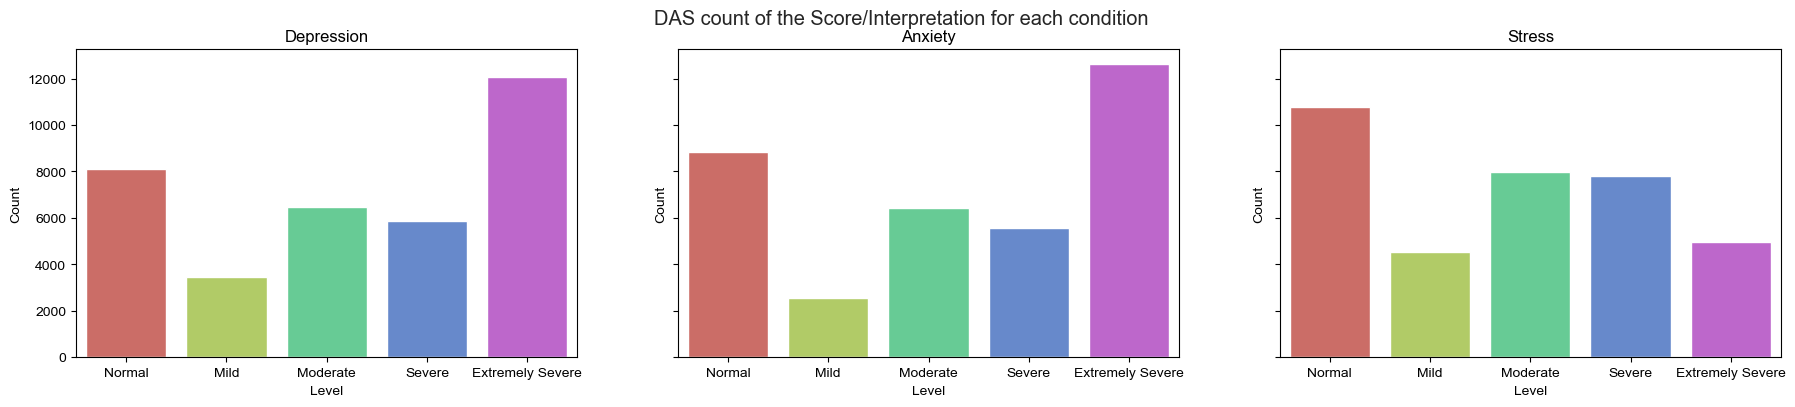

In [40]:
level_order = ["Normal", "Mild", "Moderate", "Severe", "Extremely Severe"]
fig, axes = plt.subplots(1,3,figsize=(22, 4), sharey=True)
sns.set_theme(style="whitegrid")
fig.suptitle('DAS count of the Score/Interpretation for each condition')
# Visualization of the number of answers on each level of depression
sns.countplot(ax=axes[0], data=Depression, x='intensity', palette="hls", order = level_order)
#Title
axes[0].set_title('Depression')
# Visualization of the number of answers on each level of anxiety
sns.countplot(ax=axes[1], data=Anxiety, x='intensity', palette="hls", order = level_order)
#Title
axes[1].set_title('Anxiety')
# Visualization of the number of answers on each level of stress
sns.countplot(ax=axes[2], data=Stress, x='intensity', palette="hls", order = level_order)
#Title
axes[2].set_title('Stress')
#Axis titles
[axes[i].set(xlabel='Level', ylabel='Count') for i in range(0,3)]
fig.show()

**Correlations between categorical features**

Most of the features on the three main dataframes are categorical, so they are ready to calculate the correlations between them. However, it is necessary to
transform the resulting level of each condition to indexes from 0-4, where:

0) Normal
1) Mild
2) Moderate
3) Severe
4) Extremely Severe

In [41]:
def catResults(r):
    if r == 'Normal':
        return 0
    elif r == 'Mild':
        return 1
    elif r == 'Moderate':
        return 2
    elif r == 'Severe':
        return 3
    elif r == 'Extremely Severe':
        return 4
Depression['cIntensity'] = Depression['intensity'].apply(catResults)
Anxiety['cIntensity'] = Anxiety['intensity'].apply(catResults)
Stress['cIntensity'] = Stress['intensity'].apply(catResults)
Anxiety.head(1)

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,religion,orientation,race,married,familysize,major,AgeGroup,score,intensity,cIntensity
0,3,3,3,1,3,2,2,3,3,2,...,12,1,10,1,2,no degree,0,34,Extremely Severe,4


C:\Users\carol\AppData\Local\Temp\ipykernel_16228\2922519453.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Depression.corr())
C:\Users\carol\AppData\Local\Temp\ipykernel_16228\2922519453.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Anxiety.corr(), ax=axes[0])
C:\Users\carol\AppData\Local\Temp\ipykernel_16228\2922519453.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Stress.corr(), ax=axes[1])


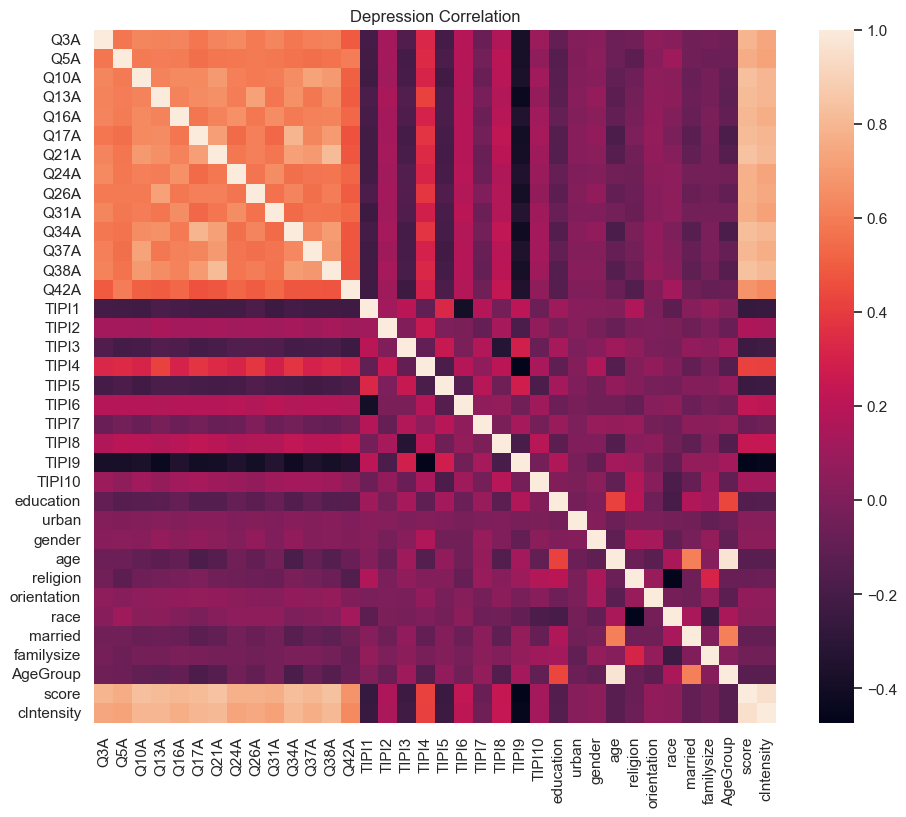

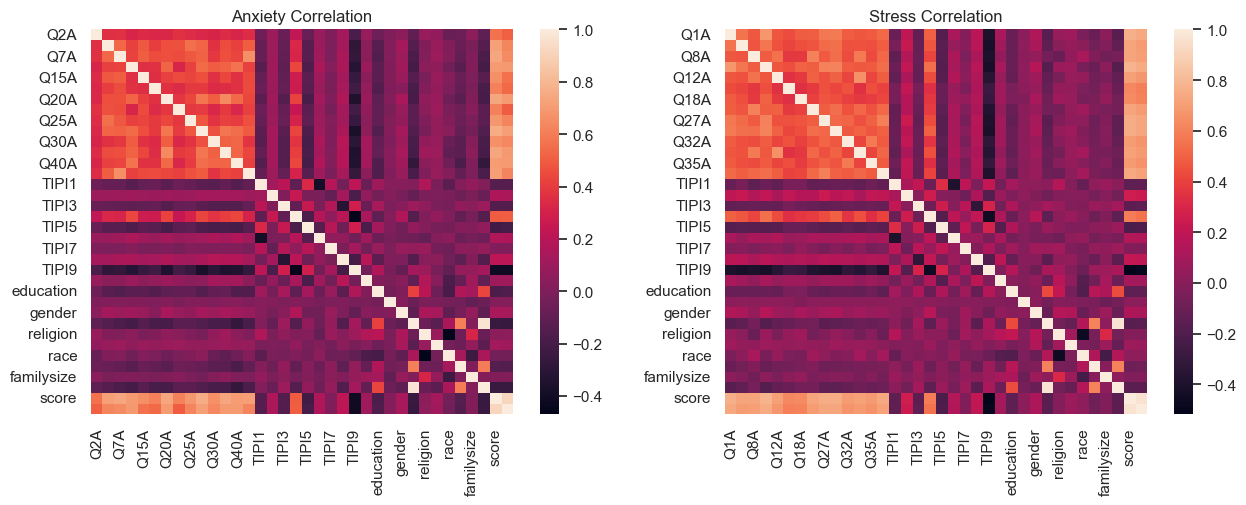

In [42]:
 # Depression df correlation heatmap
plt_1 = plt.figure(figsize=(11, 9))
sns.heatmap(Depression.corr())
plt.title('Depression Correlation')
fig, axes = plt.subplots(1,2,figsize=(15, 5))
# Anxiety df correlation heatmap
sns.heatmap(Anxiety.corr(), ax=axes[0])
axes[0].set_title('Anxiety Correlation')
# Stress df correlation heatmap
sns.heatmap(Stress.corr(), ax=axes[1])
axes[1].set_title('Stress Correlation')
plt.show()

It can be seen that TIPI9 (calmness and emotional behavior) has a strong negative correlation with the score, because the most emotionally unstable a person is, the higher their chances of getting a high score.
Now, we only stay with the important demographic information in each dataframe to analyze its behavior

In [43]:
Depression0 = Depression.copy()
Depression = Depression.drop(Depression.iloc[:, 0:14], axis=1, errors="ignore")
Depression.head(2)

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,...,religion,orientation,race,married,familysize,major,AgeGroup,score,intensity,cIntensity
0,1,5,7,7,7,7,7,5,1,1,...,12,1,10,1,2,no degree,0,27,Severe,3
1,6,5,4,7,5,4,7,7,1,5,...,7,3,70,1,4,no degree,0,24,Severe,3


In [44]:
Anxiety0 = Anxiety.copy()
Anxiety = Anxiety.drop(Anxiety.iloc[:, 0:14], axis=1, errors="ignore")
Anxiety.head(2)

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,...,religion,orientation,race,married,familysize,major,AgeGroup,score,intensity,cIntensity
0,1,5,7,7,7,7,7,5,1,1,...,12,1,10,1,2,no degree,0,34,Extremely Severe,4
1,6,5,4,7,5,4,7,7,1,5,...,7,3,70,1,4,no degree,0,17,Severe,3


In [45]:
Stress0 = Stress.copy()
Stress = Stress.drop(Stress.iloc[:, 0:14], axis=1, errors="ignore")
Stress.head(2)

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,...,religion,orientation,race,married,familysize,major,AgeGroup,score,intensity,cIntensity
0,1,5,7,7,7,7,7,5,1,1,...,12,1,10,1,2,no degree,0,40,Extremely Severe,4
1,6,5,4,7,5,4,7,7,1,5,...,7,3,70,1,4,no degree,0,27,Severe,3


**Independant and dependant variables**

Dependant
- Score
- Intensity

Independant
- Q1-Q42
- Demographic/Personal info

#### COMPARISON AND VISUALIZATION OF DEMOGRAPHIC DATA WITH MENTAL DISORDER LEVELS

Create a copy of the df to maintain the numbers for the classification groups that will be used in modeling

In [46]:
DepressionM = Stress.copy()
AnxietyM = Stress.copy()
StressM = Stress.copy()

**EDUCATION LEVEL**

The 'education' feature has 4 different categories with the following meanings:

1) Less than high school
2) High school
3) University degree
4) Graduate degree

In [47]:
def changeEducationLevelValues(value) -> str:
    if value == 1:
        return '< HighSchool'
    if value == 2:
        return 'HighSchool'
    if value == 3:
        return 'University'
    if value == 4:
        return 'Graduate'

    return value

demographic['education'] = demographic['education'].apply(changeEducationLevelValues)
Depression['education'] = Depression['education'].apply(changeEducationLevelValues)
Anxiety['education'] = Anxiety['education'].apply(changeEducationLevelValues)
Stress['education'] = Stress['education'].apply(changeEducationLevelValues)
print('Count of answers on each education level: ')
print(demographic['education'].value_counts())

Count of answers on each education level: 
University      14433
HighSchool      13542
Graduate         4578
< HighSchool     3463
Name: education, dtype: int64


C:\Users\carol\AppData\Local\Temp\ipykernel_16228\2496429770.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


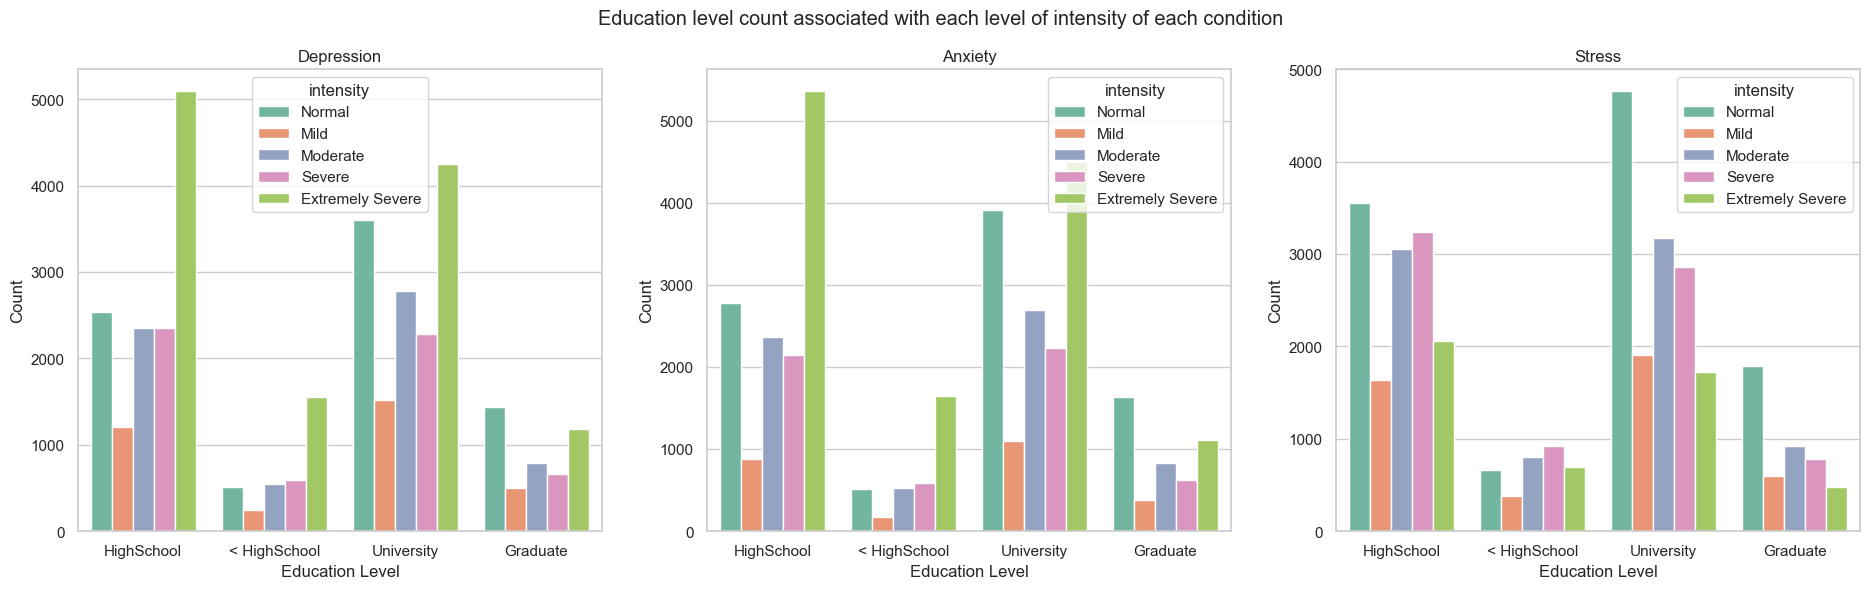

In [48]:
#education = {1:"Less than high school", 2:"High school", 3:"University Degree", 4:"Graduate Degree"}
fig, axes = plt.subplots(1,3,figsize=(23, 6))
sns.set_theme(style="whitegrid")
fig.suptitle('Education level count associated with each level of intensity of each condition')
# Education level and depression
sns.countplot(ax=axes[0], data=Depression, x='education', hue=Depression['intensity'], palette="Set2", hue_order=level_order)
#Title
axes[0].set_title('Depression')
# Education level and anxiety
sns.countplot(ax=axes[1], data=Anxiety, x='education', hue=Anxiety['intensity'], palette="Set2", hue_order=level_order)
#Title
axes[1].set_title('Anxiety')
# Education level and stress
sns.countplot(ax=axes[2], data=Stress, x='education', hue=Stress['intensity'], palette="Set2", hue_order=level_order)
#Title
axes[2].set_title('Stress')
#Axis titles
[axes[i].set(xlabel='Education Level', ylabel='Count') for i in range(0,3)]
fig.show()

The graphs show that in the education levels prior to high school, there is not much mental illness and students tend to be more or less relaxed. However, the
numbers increase greatly when they enter high school and undergraduate college, and as an example the graph shows that the three analyzed illnesses tend
to present the highest number of cases on the 'Extremely Severe' intensity level during this level of education. After high school, the DAS intensity levels start
to slowly decrease and the Graduate studies seem to resemble the relaxed intensity levels of the first school years.

**GENDER**

The 'gender' feature has 3 different categories with the following meanings:

1) Male
2) Female
3) Other


In [49]:
def changeGenderValues(value) -> str:
    if value == 1:
        return 'Male'
    if value == 2:
        return 'Female'
    if value == 3:
        return 'Other'
 
    return value

demographic['gender'] = demographic['gender'].apply(changeGenderValues)
Depression['gender'] = Depression['gender'].apply(changeGenderValues)
Anxiety['gender'] = Anxiety['gender'].apply(changeGenderValues)
Stress['gender'] = Stress['gender'].apply(changeGenderValues)
print('Count of answers on each gender: ')
print(demographic['gender'].value_counts().sort_index())

Count of answers on each gender: 
Female    27590
Male       7923
Other       503
Name: gender, dtype: int64


C:\Users\carol\AppData\Local\Temp\ipykernel_16228\2437317465.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


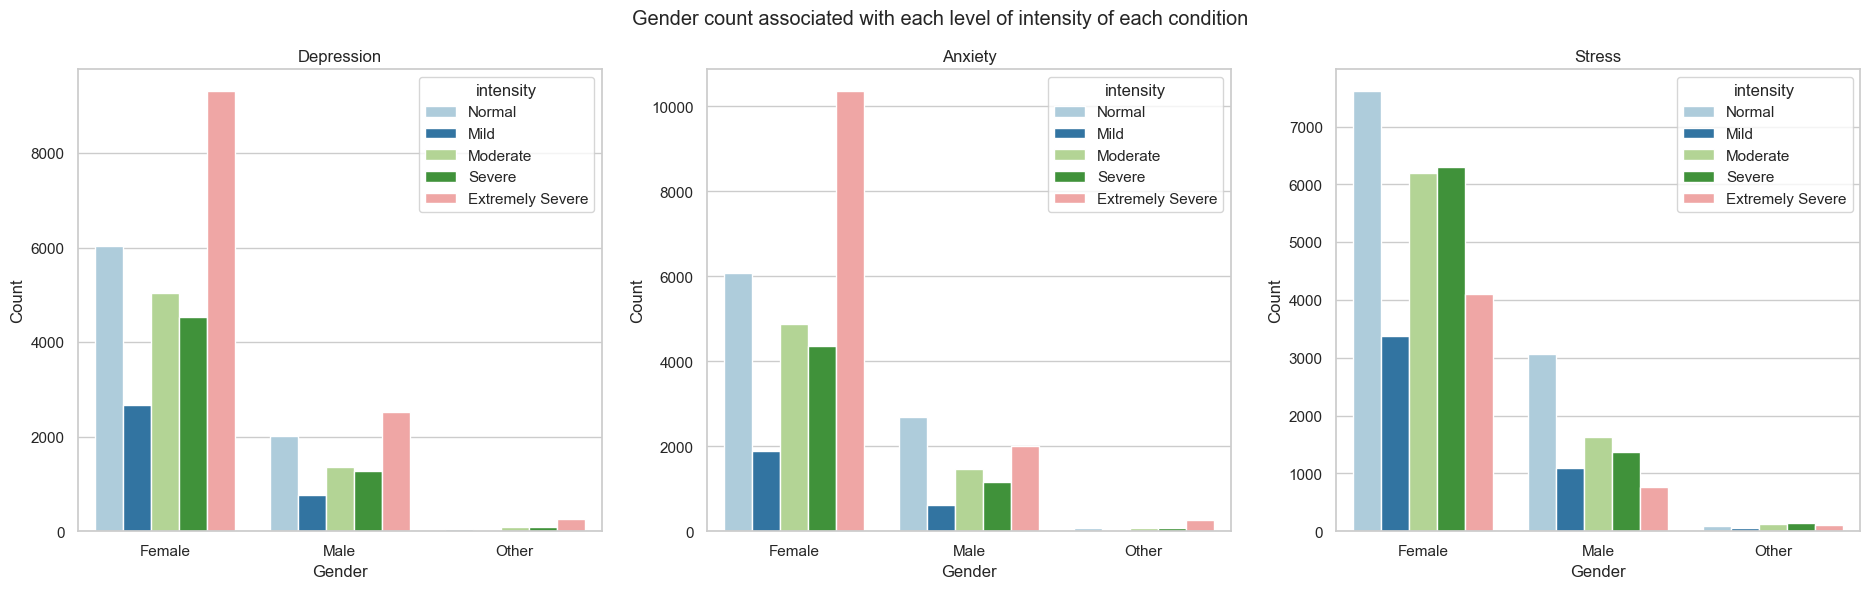

In [50]:
#gen = {1:"Male", 2:"Female", 3:"Other"}
fig, axes = plt.subplots(1,3,figsize=(23, 6))
sns.set_theme(style="whitegrid")
fig.suptitle('Gender count associated with each level of intensity of each condition')
# Gender and depression
sns.countplot(ax=axes[0], data=Depression, x='gender', hue=Depression['intensity'], palette="Paired", hue_order=level_order)
#Title
axes[0].set_title('Depression')
# Gender and anxiety
sns.countplot(ax=axes[1], data=Anxiety, x='gender', hue=Anxiety['intensity'], palette="Paired", hue_order=level_order)
#Title
axes[1].set_title('Anxiety')
# Gender and stress
sns.countplot(ax=axes[2], data=Stress, x='gender', hue=Stress['intensity'], palette="Paired", hue_order=level_order)
#Title
axes[2].set_title('Stress')
#Axis titles
[axes[i].set(xlabel='Gender', ylabel='Count') for i in range(0,3)]
fig.show()

The people that took the survey were mostly female and they present a high rate of “Extremely severe” depression and anxiety. Even though there are not
many males represented, the graph shows that they tend to have lower scores than women in all three conditions.

**AGE GROUP**

The 'AgeGroup' feature has 8 different categories with the following meanings:

0) < 20
1) 20-24
2) 25-29
3) 30-34
4) 35-39
5) 40-49
6) 50-59
7) 60+

In [51]:
def binAgeValues(value) -> str:
    if value == 0:
        return '< 20'
    if value == 1:
        return '20-24'
    if value == 2:
        return '25-29'
    if value == 3:
        return '30-34'
    if value == 4:
        return '35-39'
    if value == 5:
        return '40-49'
    if value == 6:
        return '50-59'
    if value == 7:
        return '>60'
 
    return value
demographic['AgeGroup'] = demographic['AgeGroup'].apply(binAgeValues)
Depression['AgeGroup'] = Depression['AgeGroup'].apply(binAgeValues)
Anxiety['AgeGroup'] = Anxiety['AgeGroup'].apply(binAgeValues)
Stress['AgeGroup'] = Stress['AgeGroup'].apply(binAgeValues)
print('Count of answers on each Age Group: ')
print(demographic['AgeGroup'].value_counts().sort_index())

Count of answers on each Age Group: 
20-24    13620
25-29     4997
30-34     2012
35-39     1034
40-49     1228
50-59      707
< 20     12151
>60        267
Name: AgeGroup, dtype: int64


C:\Users\carol\AppData\Local\Temp\ipykernel_16228\3159616054.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


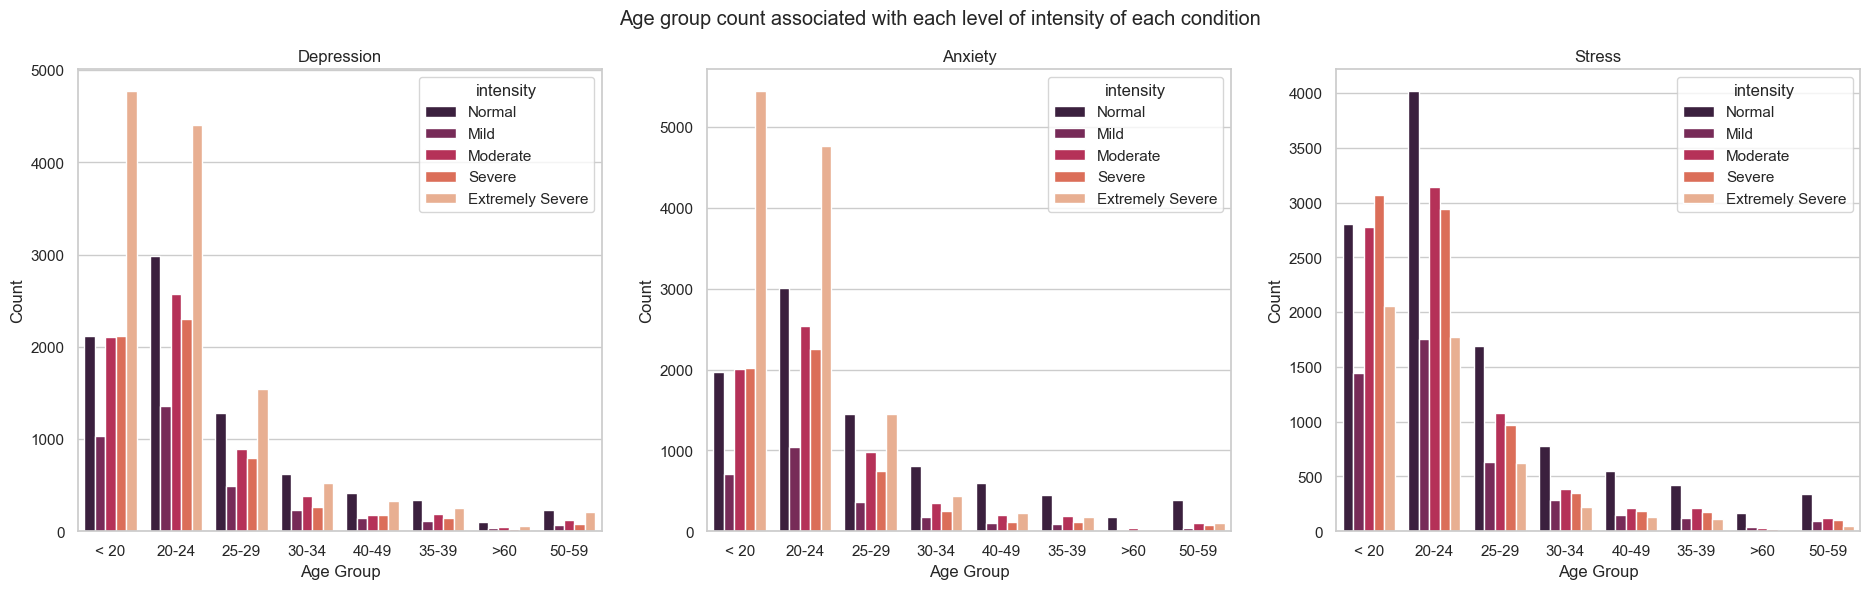

In [52]:
#agroup = {0:"<20", 1:"20-24", 2:"25-29", 3:"30-34", 4:"35-39", 5:"40-49", 6:"50-59", 7:">60"}
fig, axes = plt.subplots(1,3,figsize=(23, 6))
sns.set_theme(style="whitegrid")
fig.suptitle('Age group count associated with each level of intensity of each condition')
# Age and depression
sns.countplot(ax=axes[0], data=Depression, x='AgeGroup', hue=Depression['intensity'], palette="rocket", hue_order=level_order)
#Title
axes[0].set_title('Depression')
# Age and anxiety
sns.countplot(ax=axes[1], data=Anxiety, x='AgeGroup', hue=Anxiety['intensity'], palette="rocket", hue_order=level_order)
#Title
axes[1].set_title('Anxiety')
# Age and stress
sns.countplot(ax=axes[2], data=Stress, x='AgeGroup', hue=Stress['intensity'], palette="rocket", hue_order=level_order)
#Title
axes[2].set_title('Stress')
#Axis titles
[axes[i].set(xlabel='Age Group', ylabel='Count') for i in range(0,3)]
fig.show()

The graphs show that the majority of survey respondents are young adult people from around 20 and 24 years old. It also shows that younger people tend to
have higher scores (especially with depression and anxiety) and that the scores decrease as people get older.

**RELIGION**

The 'religion' feature has 12 different categories with the following meanings:
1) Agnostic
2) Atheist
3) Buddhist
4) Christian (Catholic)
5) Christian (Mormon)
6) Christian (Protestant)
7) Christian (Other)
8) Hindu
9) Jewish
10) Muslim
11) Sikh
12) Other

In [53]:
# change 0 value to 12 as it's other value for people who didn't enter value to this field
def updateReligionValue(value):
    if value == 0: 
        return 12
    return value
demographic['religion'] = demographic['religion'].apply(updateReligionValue)

def changeReligionValues(value) -> str:
    if (value == 0 or value == 12):
        return 'Other'
    if value == 1:
        return 'Agnostic'
    if value == 2:
        return 'Atheist'
    if value == 3:
        return 'Buddhist'
    if (value == 4 or value == 5 or value == 6 or value == 7):
        return 'Christian'
    if value == 8:
        return 'Hindu'
    if value == 9:
        return 'Jewish'
    if value == 10:
        return 'Muslim'
    if value == 11:
        return 'Sikh'
 
    return value

demographic['religion'] = demographic['religion'].apply(changeReligionValues)
Depression['religion'] = Depression['religion'].apply(changeReligionValues)
Anxiety['religion'] = Anxiety['religion'].apply(changeReligionValues)
Stress['religion'] = Stress['religion'].apply(changeReligionValues)
print('Count of answers on each religion: ')
print(demographic['religion'].value_counts())

Count of answers on each religion: 
Muslim       20447
Christian     6294
Atheist       3282
Agnostic      2800
Other         1598
Buddhist       797
Hindu          629
Jewish         111
Sikh            58
Name: religion, dtype: int64


[[Text(0.5, 0, 'Religion'), Text(0, 0.5, 'Count')],
 [Text(0.5, 0, 'Religion'), Text(0, 0.5, 'Count')],
 [Text(0.5, 0, 'Religion'), Text(0, 0.5, 'Count')]]

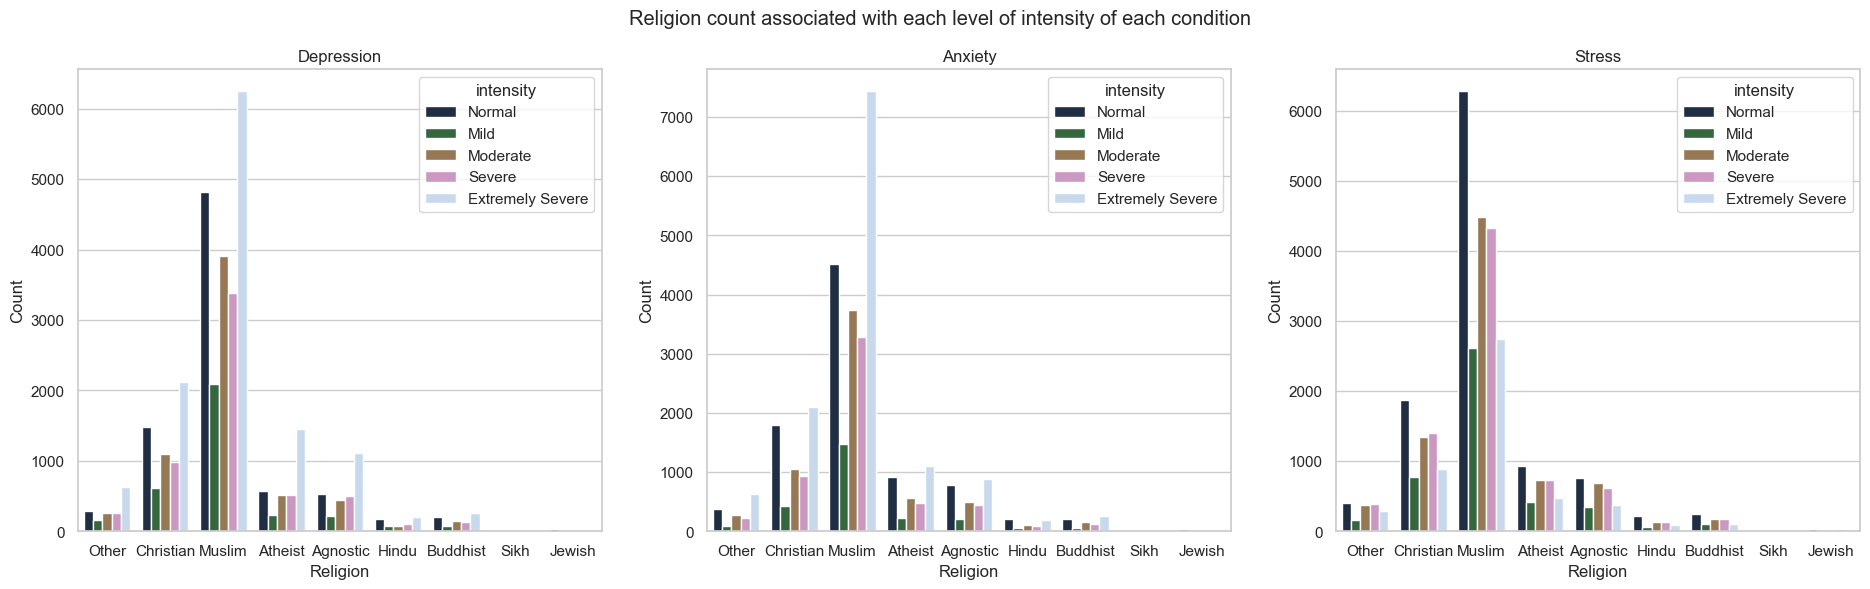

In [54]:
#rel = {1:"Agnostic", 2:"Atheist", 3:"Buddhist", 4:"Christian (Catholic)", 5:"Christian (Mormon)", 6:"Christian (Protestant)", 7:
fig, axes = plt.subplots(1,3,figsize=(23, 6))
sns.set_theme(style="whitegrid")
fig.suptitle('Religion count associated with each level of intensity of each condition')
# Religion and depression
sns.countplot(ax=axes[0], data=Depression, x='religion', hue=Depression['intensity'], palette="cubehelix", hue_order=level_order)
#Title
axes[0].set_title('Depression')
# Religion and anxiety
sns.countplot(ax=axes[1], data=Anxiety, x='religion', hue=Anxiety['intensity'], palette="cubehelix", hue_order=level_order)
#Title
axes[1].set_title('Anxiety')
# Religion and stress
sns.countplot(ax=axes[2], data=Stress, x='religion', hue=Stress['intensity'], palette="cubehelix", hue_order=level_order)
#Title
axes[2].set_title('Stress')
#Axis titles
[axes[i].set(xlabel='Religion', ylabel='Count') for i in range(0,3)]

Most of the people who took the survey were muslim.

**SEXUAL ORIENTATION**

The 'orientation' feature has 5 different categories with the following meanings:

1) Heterosexual
2) Bisexual
3) Homosexual
4) Asexual
5) Other

In [55]:
def changeOrientationValues(value) -> str:
    if value == 1:
        return 'Heterosexual'
    if value == 2:
        return 'Bisexual'
    if value == 3:
        return 'Homosexual'
    if value == 4:
        return 'Asexual'
    if value == 5:
        return 'Other'
 
    return value

demographic['orientation'] = demographic['orientation'].apply(changeOrientationValues)
Depression['orientation'] = Depression['orientation'].apply(changeOrientationValues)
Anxiety['orientation'] = Anxiety['orientation'].apply(changeOrientationValues)
Stress['orientation'] = Stress['orientation'].apply(changeOrientationValues)
print('Count of answers on each orientation option: ')
print(demographic['orientation'].value_counts())

Count of answers on each orientation option: 
Heterosexual    22133
Homosexual       4615
Bisexual         4375
Other            3102
Asexual          1791
Name: orientation, dtype: int64


[[Text(0.5, 0, 'Sexual Orientation'), Text(0, 0.5, 'Count')],
 [Text(0.5, 0, 'Sexual Orientation'), Text(0, 0.5, 'Count')],
 [Text(0.5, 0, 'Sexual Orientation'), Text(0, 0.5, 'Count')]]

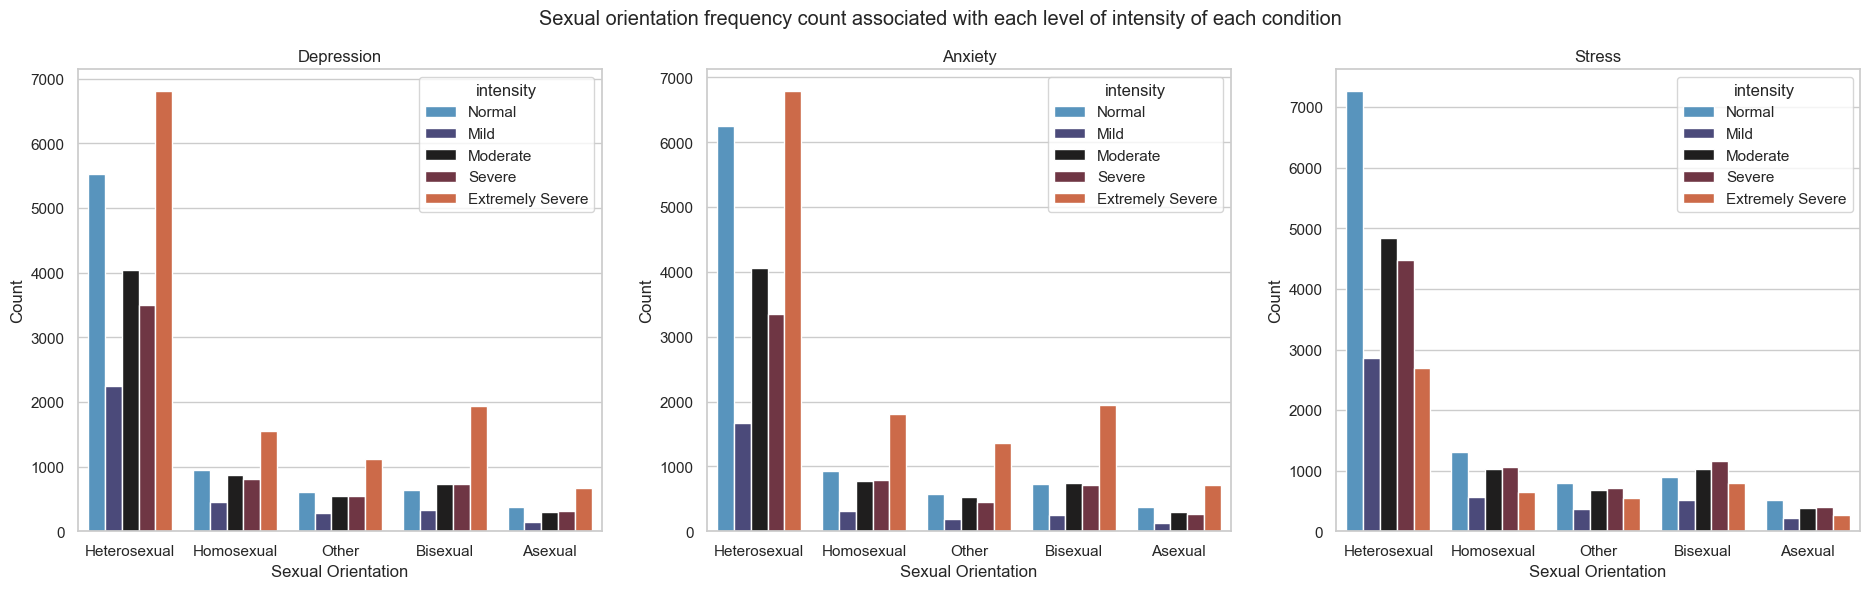

In [56]:
#ori = {1:"Heterosexual", 2:"Bisexual", 3:"Homosexual", 4:"Asexual", 5:"Other"}
fig, axes = plt.subplots(1,3,figsize=(23, 6))
sns.set_theme(style="whitegrid")
fig.suptitle('Sexual orientation frequency count associated with each level of intensity of each condition')
# Orientation and depression
sns.countplot(ax=axes[0], data=Depression, x='orientation', hue=Depression['intensity'], palette="icefire", hue_order=level_order)
#Title
axes[0].set_title('Depression')
# Orientation and anxiety
sns.countplot(ax=axes[1], data=Anxiety, x='orientation', hue=Anxiety['intensity'], palette="icefire", hue_order=level_order)
#Title
axes[1].set_title('Anxiety')
# Orientation and stress
sns.countplot(ax=axes[2], data=Stress, x='orientation', hue=Stress['intensity'], palette="icefire", hue_order=level_order)
#Title
axes[2].set_title('Stress')
#Axis titles
[axes[i].set(xlabel='Sexual Orientation', ylabel='Count') for i in range(0,3)]

**RACE**

The 'race' feature has 7 different categories with the following meanings:

10) Asian
20) Arab
30) Black
40) Indigenous Australian
50) Native American
60) White
70) Other


In [57]:
def changeRaceValues(value) -> str:
    if value == 10:
        return 'Asian'
    if value == 20:
        return 'Arab'
    if value == 30:
        return 'Black'
    if value == 40:
        return 'Indig. Aust.'
    if value == 50:
        return 'Nat. Am.'
    if value == 60:
        return 'White'
    if value == 70:
        return 'Other'
 
    return value
demographic['race'] = demographic['race'].apply(changeRaceValues)
Depression['race'] = Depression['race'].apply(changeRaceValues)
Anxiety['race'] = Anxiety['race'].apply(changeRaceValues)
Stress['race'] = Stress['race'].apply(changeRaceValues)
print('Count of answers on each race: ')
print(demographic['race'].value_counts())

Count of answers on each race: 
Asian           21335
White            9254
Other            4396
Black             542
Arab              289
Nat. Am.          182
Indig. Aust.       18
Name: race, dtype: int64


[[Text(0.5, 0, 'Race'), Text(0, 0.5, 'Count')],
 [Text(0.5, 0, 'Race'), Text(0, 0.5, 'Count')],
 [Text(0.5, 0, 'Race'), Text(0, 0.5, 'Count')]]

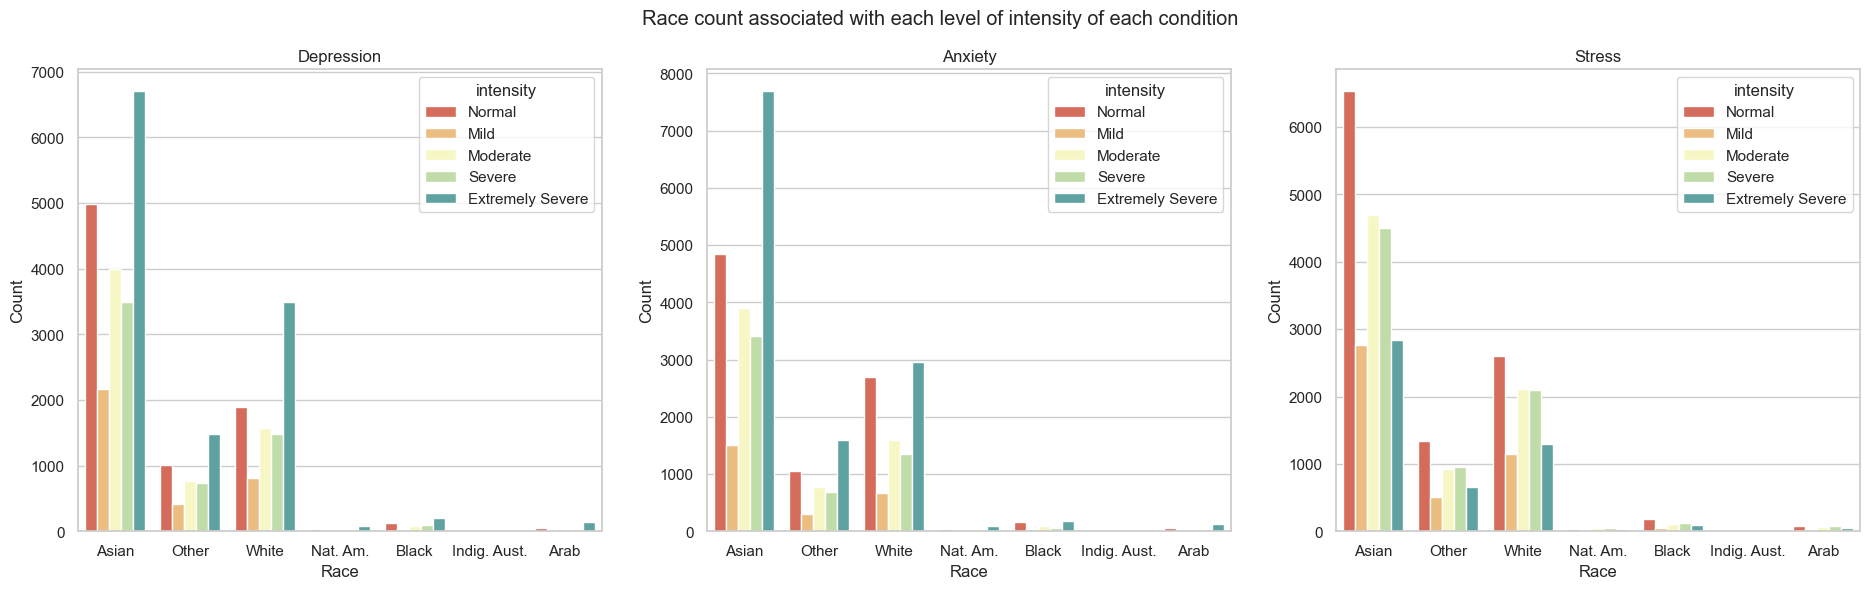

In [58]:
#rac = {10:"Asian", 20:"Arab", 30:"Black", 40:"Indigenous Australian", 50:"Native American", 60:"White", 70:"Other"}
fig, axes = plt.subplots(1,3,figsize=(23, 6))
sns.set_theme(style="whitegrid")
fig.suptitle('Race count associated with each level of intensity of each condition')
# Race and depression
sns.countplot(ax=axes[0], data=Depression, x='race', hue=Depression['intensity'], palette="Spectral", hue_order=level_order)
#Title
axes[0].set_title('Depression')
# Race and anxiety
sns.countplot(ax=axes[1], data=Anxiety, x='race', hue=Anxiety['intensity'], palette="Spectral", hue_order=level_order)
#Title
axes[1].set_title('Anxiety')
# Race and stress
sns.countplot(ax=axes[2], data=Stress, x='race', hue=Stress['intensity'], palette="Spectral", hue_order=level_order)
#Title
axes[2].set_title('Stress')
#Axis titles
[axes[i].set(xlabel='Race', ylabel='Count') for i in range(0,3)]

Most respondents are asian, followed by white and others. Figure 2.6 shows that the predominant categories have similar distributions for the different
condition intensities.

**MARITAL STATUS**

The 'married' feature has 3 different categories with the following meanings:

1) Never married
2) Currently married
3) Previously married

In [59]:
def changeMaritalStatusValues(value) -> str:
    if value == 1:
        return 'Never Married'
    if value == 2:
        return 'Currently Married'
    if value == 3:
        return 'Previously Married'
 
    return value
demographic['married'] = demographic['married'].apply(changeMaritalStatusValues)
Depression['married'] = Depression['married'].apply(changeMaritalStatusValues)
Anxiety['married'] = Anxiety['married'].apply(changeMaritalStatusValues)
Stress['married'] = Stress['married'].apply(changeMaritalStatusValues)
print('Count of answers on each marital status: ')
print(demographic['married'].value_counts())

Count of answers on each marital status: 
Never Married         30830
Currently Married      4003
Previously Married     1183
Name: married, dtype: int64


[[Text(0.5, 0, 'Marital Status'), Text(0, 0.5, 'Count')],
 [Text(0.5, 0, 'Marital Status'), Text(0, 0.5, 'Count')],
 [Text(0.5, 0, 'Marital Status'), Text(0, 0.5, 'Count')]]

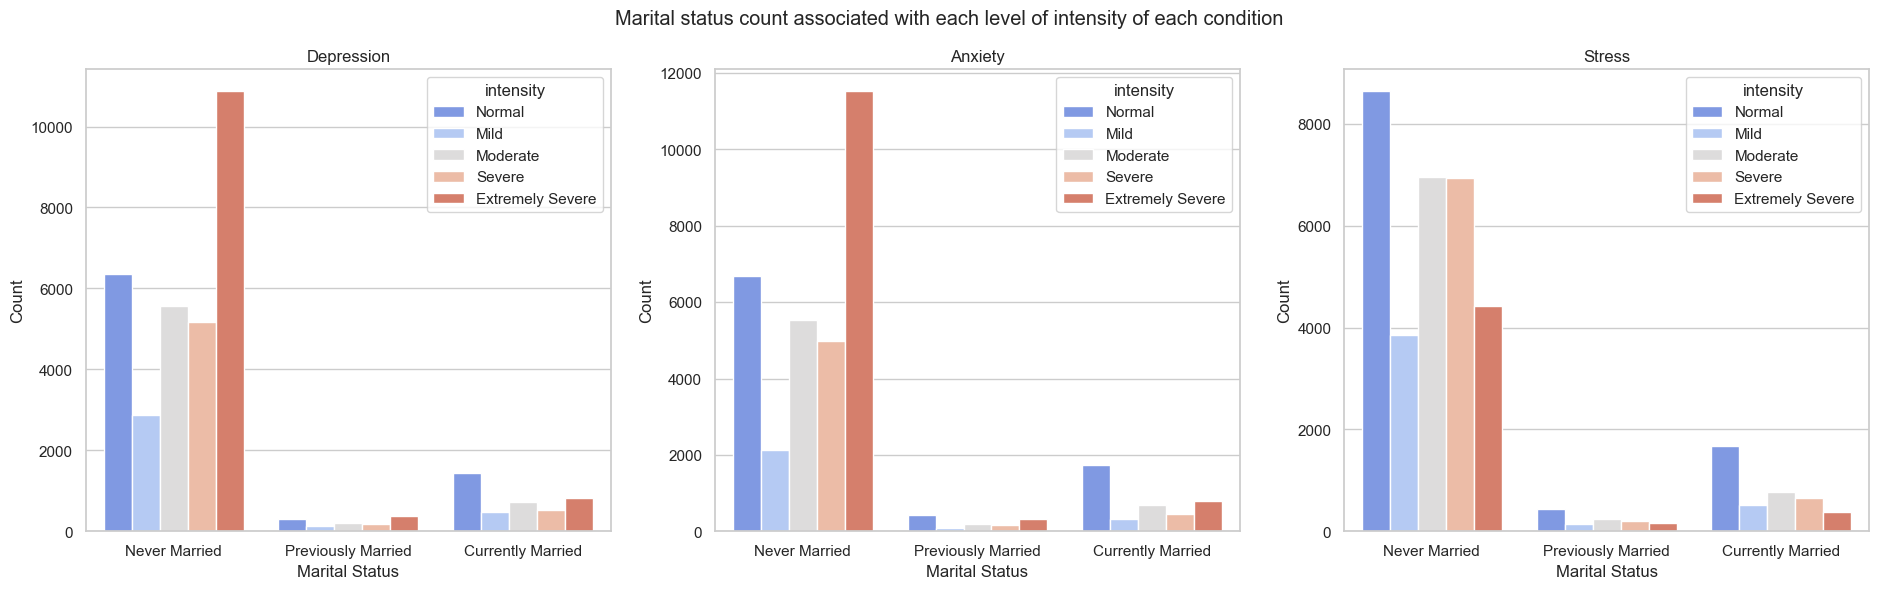

In [60]:
#ms = {1:"Never married", 2:"Currently married", 3:"Previously married"}
fig, axes = plt.subplots(1,3,figsize=(23, 6))
sns.set_theme(style="whitegrid")
fig.suptitle('Marital status count associated with each level of intensity of each condition')
# Marital Status and depression
sns.countplot(ax=axes[0], data=Depression, x='married', hue=Depression['intensity'], palette="coolwarm", hue_order=level_order)
#Title
axes[0].set_title('Depression')
# Marital Status and anxiety
sns.countplot(ax=axes[1], data=Anxiety, x='married', hue=Anxiety['intensity'], palette="coolwarm", hue_order=level_order)
#Title
axes[1].set_title('Anxiety')
# Marital Status and stress
sns.countplot(ax=axes[2], data=Stress, x='married', hue=Stress['intensity'], palette="coolwarm", hue_order=level_order)
#Title
axes[2].set_title('Stress')
#Axis titles
[axes[i].set(xlabel='Marital Status', ylabel='Count') for i in range(0,3)]

The graphs show that most respondents are single and that they tend to have higher levels of depression and anxiety than married people.

**Creation of a single dataframe**

Here, we will create a single DF to use for our model by combining the Depression, Anxiety and Stress DFs and creating one label column (that is used as the ground truth for evaluation in later steps). This label column computed as the sum of the score column in each DF, will be named "DASS" : for Depression, Anxiety and Stress Score

In [61]:
# Establish some primary keys to perform the inner join
DepressionM['key'] = DepressionM.index
AnxietyM['key'] = AnxietyM.index
StressM['key'] = StressM.index

features = ['key', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'education', 'urban', 'race', 'married', 'familysize', 'major', 'AgeGroup']

dass = pd.merge(DepressionM, AnxietyM, 
 how='inner',
 on=features)
 
dass = pd.merge(dass, StressM, 
 how='inner',
 on=features)

dass["DASS"] = dass["score_x"] + dass["score_y"] + dass["score"]
dass = dass.drop(columns=["score_x", "score_y", "score", "key"], axis=1, errors="ignore")
dass = dass.drop(columns=["intensity_x", "intensity_y", "intensity"], axis=1, errors="ignore")
dass = dass.drop(columns=["intensity_x", "intensity_y", "intensity"], axis=1, errors="ignore")
dass = dass.drop(columns=["cIntensity_x", "cIntensity_y", "cIntensity"], axis=1, errors="ignore")
dass = dass.drop(columns=["religion_x", "religion_y"], axis=1, errors="ignore")
dass = dass.drop(columns=["gender_x", "gender_y"], axis=1, errors="ignore")
dass = dass.drop(columns=["age_x", "age_y"], axis=1, errors="ignore")
dass = dass.drop(columns=["orientation_x", "orientation_y"], axis=1, errors="ignore")
print("DASS df dimensions: ", dass.shape)
dass.head()

DASS df dimensions:  (36016, 22)


,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,...,race,married,familysize,major,AgeGroup,gender,age,religion,orientation,DASS
0,1,5,7,7,7,7,7,5,1,1,...,10,1,2,no degree,0,2,16.0,12,1,120
1,6,5,4,7,5,4,7,7,1,5,...,70,1,4,no degree,0,2,16.0,7,3,81
2,2,5,2,2,5,6,5,5,3,2,...,60,1,3,no degree,0,2,17.0,4,3,51
3,1,1,7,4,6,4,6,1,6,1,...,70,1,5,science,0,2,13.0,4,5,48
4,2,5,3,6,5,5,5,6,3,3,...,10,1,4,psychology,0,2,19.0,10,1,87


- 1 -> 25 -> Normal
- 2 -> 26-50 -> Mild
- 3 -> 51-75 -> Moderate
- 4 -> 76-100 -> Severe
- 5 -> 101-126 -> Extremely severe

In [62]:
# Max and min of DASS score
maxi = dass['DASS'].max()
mini = dass['DASS'].min()
print(maxi, mini)

126 0


In [63]:
# Classify the resulting DASS score
def classifyDASS(x):
    if x < 25:
        return "Normal"
    elif 26 <= x <= 50:
        return "Mild"
    elif 51 <= x <= 75:
        return "Moderate"
    elif 76 <= x <= 100:
        return "Severe"
    else:
        return "Extremely Severe"
dass['cDASS']=dass['DASS'].apply(classifyDASS)
dass['cDASS'].value_counts().sort_index()

Extremely Severe     4962
Mild                 8203
Moderate            10237
Normal               4801
Severe               7813
Name: cDASS, dtype: int64

In [64]:
dass = dass.drop('DASS', axis=1, errors="ignore")
n = dass.shape[0] == Depression.shape[0]
print("Does the dass dataset has the same rows as the previous 3 df? ", n)

Does the dass dataset has the same rows as the previous 3 df?  True


### Data Analytics and Modeling


**Importing modeling libraries**

In [65]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Naive bayes
from sklearn.naive_bayes import GaussianNB
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
# Performance metrics
from sklearn.metrics import r2_score,accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report
#from sklearn.metrics import plot_confusion_matrix

#### DASS dataframe

In this section, we'll analyze the DASS dataframe through modeling with Linear Regression to try to find a good prediction for the dass continuous variable
which represents the total score.

**Split the data into training and testing set**

In [66]:
# Input data to the model
X = dass.drop(["cDASS", "major"], axis=1, errors="ignore")
# Ground truth label
y = dass["cDASS"]
# Splitting the data, training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=100)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train and test set dimensions
print('Training Set:',X_train.shape,y_train.shape)
print('Test Set:',X_test.shape,y_test.shape)

Training Set: (28812, 20) (28812,)
Test Set: (7204, 20) (7204,)


**Gaussian NB**

In [67]:
NB=GaussianNB().fit(X_train_scaled,y_train)
prediction = NB.predict(X_test_scaled)
aNB1=round(accuracy_score(y_test,prediction),2)
print('Accuracy:', aNB1)
f1NB1=round(f1_score(y_test,prediction,average='weighted'),2)
print('F1_Score:', f1NB1)
recall=round(recall_score(y_test,prediction,average='weighted'),2)
print('Recall_Score:', recall)
precision=round(precision_score(y_test,prediction,average='weighted'),2)
print('Precision_Score:', precision)
classification=classification_report(
 digits=2,
 y_true=y_test,
 y_pred=prediction)
print(classification)

#fig, ax = plt.subplots(figsize=(10, 10))
#plot_confusion_matrix(NB,X_test_scaled,y_test,ax=ax)

Accuracy: 0.39
F1_Score: 0.38
Recall_Score: 0.39
Precision_Score: 0.39
                  precision    recall  f1-score   support

Extremely Severe       0.44      0.32      0.37      1018
            Mild       0.37      0.28      0.32      1637
        Moderate       0.37      0.40      0.38      2039
          Normal       0.47      0.52      0.49       962
          Severe       0.36      0.44      0.40      1548

        accuracy                           0.39      7204
       macro avg       0.40      0.39      0.39      7204
    weighted avg       0.39      0.39      0.38      7204



**Random Forest Classifier**

In [68]:
RF=RandomForestClassifier(n_estimators=200,min_samples_split=3,min_samples_leaf=1,max_depth=160).fit(X_train_scaled, y_train)
prediction = RF.predict(X_test_scaled)
aRF1=round(accuracy_score(y_test,prediction),2)
print('Accuracy:', aRF1)
f1RF1=round(f1_score(y_test,prediction,average='weighted'),2)
print('F1_Score:', f1RF1)
recall=round(recall_score(y_test,prediction,average='weighted'),2)
print('Recall_Score:', recall)
precision=round(precision_score(y_test,prediction,average='weighted'),2)
print('Precision_Score:', precision)
classification=classification_report(
 digits=2,
 y_true=y_test,
 y_pred=prediction)
print(classification)
#fig, ax = plt.subplots(figsize=(10, 10))
#plot_confusion_matrix(RF,X_test_scaled,y_test,ax=ax)

Accuracy: 0.42
F1_Score: 0.42
Recall_Score: 0.42
Precision_Score: 0.42
                  precision    recall  f1-score   support

Extremely Severe       0.49      0.35      0.41      1018
            Mild       0.40      0.42      0.41      1637
        Moderate       0.39      0.48      0.43      2039
          Normal       0.56      0.47      0.51       962
          Severe       0.38      0.34      0.35      1548

        accuracy                           0.42      7204
       macro avg       0.44      0.41      0.42      7204
    weighted avg       0.42      0.42      0.42      7204



**AdaBoost (Ensemble Method)**

In [69]:
AB=AdaBoostClassifier(n_estimators=50,learning_rate=1)
AB.fit(X_train_scaled, y_train)
prediction = AB.predict(X_test_scaled)
aAB1=round(accuracy_score(y_test,prediction),2)
print('Accuracy:', aAB1)
f1AB1=round(f1_score(y_test,prediction,average='weighted'),2)
print('F1_Score:', f1AB1)
recall=round(recall_score(y_test,prediction,average='weighted'),2)
print('Recall_Score:', recall)
precision=round(precision_score(y_test,prediction,average='weighted'),2)
print('Precision_Score:', precision)
classification=classification_report(
 digits=2,
 y_true=y_test,
 y_pred=prediction)
print(classification)
#fig, ax = plt.subplots(figsize=(10, 10))
#plot_confusion_matrix(AB,X_test_scaled,y_test,ax=ax)

Accuracy: 0.42
F1_Score: 0.42
Recall_Score: 0.42
Precision_Score: 0.43
                  precision    recall  f1-score   support

Extremely Severe       0.51      0.33      0.40      1018
            Mild       0.41      0.42      0.41      1637
        Moderate       0.40      0.49      0.44      2039
          Normal       0.53      0.45      0.49       962
          Severe       0.38      0.36      0.37      1548

        accuracy                           0.42      7204
       macro avg       0.44      0.41      0.42      7204
    weighted avg       0.43      0.42      0.42      7204



**Complete DASS score model summary**

In [70]:
summary={
 'Model':['GaussianNB','Random-Forest','AdaBoost'],
 'Accuracy(%)':[aNB1*100, aRF1*100, aAB1*100],
 'F1_Score(%)':[f1NB1*100, f1RF1*100, f1AB1*100],
 }
summaryDass=pd.DataFrame(summary)
summaryDass['key'] = summaryDass.index
summaryDass

,Model,Accuracy(%),F1_Score(%),key
0,GaussianNB,39.0,38.0,0
1,Random-Forest,42.0,42.0,1
2,AdaBoost,42.0,42.0,2


As it can be seen, the use of the whole DAS score gives really low accuracies, with the greatest value being around 45%. Therefore, we will start applying the
same models to the other 3 data frames to see if we can get higher accuracies and better predictions.

### Depression dataframe

**Split the data into training and testing set**

In [71]:
# Input data to the model
X = Depression0.drop(["cIntensity", "intensity", "score", "major"], axis=1, errors="ignore")
# Ground truth label
y = Depression0["intensity"]
# Splitting the data, training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=100)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train and test set dimensions
print('Training Set:',X_train.shape,y_train.shape)
print('Test Set:',X_test.shape,y_test.shape)

Training Set: (28812, 34) (28812,)
Test Set: (7204, 34) (7204,)


**Gaussian NB**

In [72]:
NB=GaussianNB().fit(X_train_scaled,y_train)
prediction = NB.predict(X_test_scaled)
aNB2=round(accuracy_score(y_test,prediction),2)
print('Accuracy:', aNB2)
f1NB2=round(f1_score(y_test,prediction,average='weighted'),2)
print('F1_Score:', f1NB2)
recall=round(recall_score(y_test,prediction,average='weighted'),2)
print('Recall_Score:', recall)
precision=round(precision_score(y_test,prediction,average='weighted'),2)
print('Precision_Score:', precision)
classification=classification_report(
 digits=2,
 y_true=y_test,
 y_pred=prediction)
print(classification)
#fig, ax = plt.subplots(figsize=(10, 10))
#plot_confusion_matrix(NB,X_test_scaled,y_test,ax=ax)

Accuracy: 0.86
F1_Score: 0.87
Recall_Score: 0.86
Precision_Score: 0.89


                  precision    recall  f1-score   support

Extremely Severe       1.00      0.85      0.92      2434
            Mild       0.60      0.81      0.69       651
        Moderate       0.86      0.86      0.86      1335
          Normal       0.99      0.85      0.91      1607
          Severe       0.72      0.93      0.81      1177

        accuracy                           0.86      7204
       macro avg       0.83      0.86      0.84      7204
    weighted avg       0.89      0.86      0.87      7204



**Random Forest Classifier**

In [74]:
RF=RandomForestClassifier(n_estimators=200,min_samples_split=3, min_samples_leaf=1,max_depth=160).fit(X_train_scaled, y_train)
prediction = RF.predict(X_test_scaled)
aRF2=round(accuracy_score(y_test,prediction),2)
print('Accuracy:', aRF2)
f1RF2=round(f1_score(y_test,prediction,average='weighted'),2)
print('F1_Score:', f1RF2)
recall=round(recall_score(y_test,prediction,average='weighted'),2)
print('Recall_Score:', recall)
precision=round(precision_score(y_test,prediction,average='weighted'),2)
print('Precision_Score:', precision)
classification=classification_report(
 digits=2,
 y_true=y_test,
 y_pred=prediction)
print(classification)
#fig, ax = plt.subplots(figsize=(10, 10))
#plot_confusion_matrix(RF,X_test_scaled,y_test,ax=ax)

Accuracy: 0.92
F1_Score: 0.92
Recall_Score: 0.92
Precision_Score: 0.92
                  precision    recall  f1-score   support

Extremely Severe       0.97      0.98      0.97      2434
            Mild       0.87      0.65      0.75       651
        Moderate       0.87      0.93      0.90      1335
          Normal       0.94      0.99      0.96      1607
          Severe       0.90      0.88      0.89      1177

        accuracy                           0.92      7204
       macro avg       0.91      0.88      0.89      7204
    weighted avg       0.92      0.92      0.92      7204



**AdaBoost (Ensemble Method)**

In [75]:
AB=AdaBoostClassifier(n_estimators=50,learning_rate=1)
AB.fit(X_train_scaled, y_train)
prediction = AB.predict(X_test_scaled)
aAB2=round(accuracy_score(y_test,prediction),2)
print('Accuracy:', aAB2)
f1AB2=round(f1_score(y_test,prediction,average='weighted'),2)
print('F1_Score:', f1AB2)
recall=round(recall_score(y_test,prediction,average='weighted'),2)
print('Recall_Score:', recall)
precision=round(precision_score(y_test,prediction,average='weighted'),2)
print('Precision_Score:', precision)
classification=classification_report(
 digits=2,
 y_true=y_test,
 y_pred=prediction)
print(classification)
#fig, ax = plt.subplots(figsize=(10, 10))
#plot_confusion_matrix(AB,X_test_scaled,y_test,ax=ax)

Accuracy: 0.75
F1_Score: 0.76
Recall_Score: 0.75
Precision_Score: 0.83
                  precision    recall  f1-score   support

Extremely Severe       1.00      0.67      0.80      2434
            Mild       0.41      0.69      0.52       651
        Moderate       0.78      1.00      0.87      1335
          Normal       1.00      0.60      0.75      1607
          Severe       0.56      0.85      0.67      1177

        accuracy                           0.75      7204
       macro avg       0.75      0.76      0.72      7204
    weighted avg       0.83      0.75      0.76      7204



**Complete Depression modeling summary**

In [76]:
summary={
 'Model':['GaussianNB','Random-Forest','AdaBoost'],
 'Accuracy(%)':[aNB2*100, aRF2*100, aAB2*100],
 'F1_Score(%)':[f1NB2*100, f1RF2*100, f1AB2*100],
 }
summaryDepression=pd.DataFrame(summary)
summaryDepression['key'] = summaryDepression.index
summaryDepression

,Model,Accuracy(%),F1_Score(%),key
0,GaussianNB,86.0,87.0,0
1,Random-Forest,92.0,92.0,1
2,AdaBoost,75.0,76.0,2


#### Anxiety dataframe

**Split the data into training and testing set**

In [77]:
# Input data to the model
X = Anxiety0.drop(["cIntensity", "intensity", "score", "major"], axis=1, errors="ignore")
# Ground truth label
y = Anxiety0["intensity"]
# Splitting the data, training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=100)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train and test set dimensions
print('Training Set:',X_train.shape,y_train.shape)
print('Test Set:',X_test.shape,y_test.shape)

Training Set: (28812, 34) (28812,)
Test Set: (7204, 34) (7204,)


**Gaussian NB**

In [78]:
NB=GaussianNB().fit(X_train_scaled,y_train)
prediction = NB.predict(X_test_scaled)
aNB3=round(accuracy_score(y_test,prediction),2)
print('Accuracy:', aNB3)
f1NB3=round(f1_score(y_test,prediction,average='weighted'),2)
print('F1_Score:', f1NB3)
recall=round(recall_score(y_test,prediction,average='weighted'),2)
print('Recall_Score:', recall)
precision=round(precision_score(y_test,prediction,average='weighted'),2)
print('Precision_Score:', precision)
classification=classification_report(
 digits=2,
 y_true=y_test,
 y_pred=prediction)
print(classification)
#fig, ax = plt.subplots(figsize=(10, 10))
#plot_confusion_matrix(NB,X_test_scaled,y_test,ax=ax)

Accuracy: 0.81
F1_Score: 0.82
Recall_Score: 0.81
Precision_Score: 0.84
                  precision    recall  f1-score   support

Extremely Severe       0.99      0.85      0.92      2560
            Mild       0.42      0.49      0.45       476
        Moderate       0.73      0.79      0.76      1268
          Normal       0.96      0.84      0.90      1763
          Severe       0.63      0.84      0.72      1137

        accuracy                           0.81      7204
       macro avg       0.75      0.76      0.75      7204
    weighted avg       0.84      0.81      0.82      7204



**Random Forest Classifier**

In [80]:
RF=RandomForestClassifier(n_estimators=200,min_samples_split=3,min_samples_leaf=1,max_depth=160).fit(X_train_scaled, y_train)
prediction = RF.predict(X_test_scaled)
aRF3=round(accuracy_score(y_test,prediction),2)
print('Accuracy:', aRF3)
f1RF3=round(f1_score(y_test,prediction,average='weighted'),2)
print('F1_Score:', f1RF3)
recall=round(recall_score(y_test,prediction,average='weighted'),2)
print('Recall_Score:', recall)
precision=round(precision_score(y_test,prediction,average='weighted'),2)
print('Precision_Score:', precision)
classification=classification_report(
 digits=2,
 y_true=y_test,
 y_pred=prediction)
print(classification)
#fig, ax = plt.subplots(figsize=(10, 10))
#plot_confusion_matrix(RF,X_test_scaled,y_test,ax=ax)

Accuracy: 0.87
F1_Score: 0.85
Recall_Score: 0.87
Precision_Score: 0.87
                  precision    recall  f1-score   support

Extremely Severe       0.93      0.97      0.95      2560
            Mild       0.81      0.11      0.19       476
        Moderate       0.73      0.91      0.81      1268
          Normal       0.90      0.99      0.94      1763
          Severe       0.84      0.70      0.76      1137

        accuracy                           0.87      7204
       macro avg       0.84      0.74      0.73      7204
    weighted avg       0.87      0.87      0.85      7204



**AdaBoost (Ensemble Method)**

In [81]:
AB=AdaBoostClassifier(n_estimators=50,learning_rate=1)
AB.fit(X_train_scaled, y_train)
prediction = AB.predict(X_test_scaled)
aAB3=round(accuracy_score(y_test,prediction),2)
print('Accuracy:', aAB3)
f1AB3=round(f1_score(y_test,prediction,average='weighted'),2)
print('F1_Score:', f1AB3)
recall=round(recall_score(y_test,prediction,average='weighted'),2)
print('Recall_Score:', recall)
precision=round(precision_score(y_test,prediction,average='weighted'),2)
print('Precision_Score:', precision)
classification=classification_report(
 digits=2,
 y_true=y_test,
 y_pred=prediction)
print(classification)
#fig, ax = plt.subplots(figsize=(10, 10))
#plot_confusion_matrix(AB,X_test_scaled,y_test,ax=ax)

Accuracy: 0.7
F1_Score: 0.72
Recall_Score: 0.7
Precision_Score: 0.81
                  precision    recall  f1-score   support

Extremely Severe       1.00      0.61      0.75      2560
            Mild       0.29      0.49      0.36       476
        Moderate       0.69      1.00      0.81      1268
          Normal       1.00      0.68      0.81      1763
          Severe       0.44      0.70      0.54      1137

        accuracy                           0.70      7204
       macro avg       0.68      0.70      0.66      7204
    weighted avg       0.81      0.70      0.72      7204



**Complete Anxiety modeling summary**

In [82]:
summary={
 'Model':['GaussianNB','Random-Forest','AdaBoost'],
 'Accuracy(%)':[aNB3*100, aRF3*100, aAB3*100],
 'F1_Score(%)':[f1NB3*100, f1RF3*100, f1AB3*100],
 }
summaryAnxiety=pd.DataFrame(summary)
summaryAnxiety['key'] = summaryAnxiety.index
summaryAnxiety

,Model,Accuracy(%),F1_Score(%),key
0,GaussianNB,81.0,82.0,0
1,Random-Forest,87.0,85.0,1
2,AdaBoost,70.0,72.0,2


#### Stress dataframe


**Split the data into training and testing set**

In [83]:
# Input data to the model
X = Stress0.drop(["cIntensity", "intensity", "score", "major"], axis=1, errors="ignore")
# Ground truth label
y = Stress0["intensity"]
# Splitting the data, training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=100)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train and test set dimensions
print('Training Set:',X_train.shape,y_train.shape)
print('Test Set:',X_test.shape,y_test.shape)

Training Set: (28812, 34) (28812,)
Test Set: (7204, 34) (7204,)


**Gaussian NB**

In [84]:
NB=GaussianNB().fit(X_train_scaled,y_train)
prediction = NB.predict(X_test_scaled)
aNB4=round(accuracy_score(y_test,prediction),2)
print('Accuracy:', aNB4)
f1NB4=round(f1_score(y_test,prediction,average='weighted'),2)
print('F1_Score:', f1NB4)
recall=round(recall_score(y_test,prediction,average='weighted'),2)
print('Recall_Score:', recall)
precision=round(precision_score(y_test,prediction,average='weighted'),2)
print('Precision_Score:', precision)
classification=classification_report(
 digits=2,
 y_true=y_test,
 y_pred=prediction)
print(classification)
#fig, ax = plt.subplots(figsize=(10, 10))
#plot_confusion_matrix(NB,X_test_scaled,y_test,ax=ax)

Accuracy: 0.84
F1_Score: 0.85
Recall_Score: 0.84
Precision_Score: 0.86
                  precision    recall  f1-score   support

Extremely Severe       0.96      0.84      0.90      1018
            Mild       0.57      0.75      0.65       863
        Moderate       0.82      0.84      0.83      1608
          Normal       0.98      0.83      0.90      2167
          Severe       0.84      0.90      0.87      1548

        accuracy                           0.84      7204
       macro avg       0.83      0.83      0.83      7204
    weighted avg       0.86      0.84      0.85      7204



**Random Forest Classifier**

In [85]:
RF=RandomForestClassifier(n_estimators=200,min_samples_split=3,min_samples_leaf=1,max_depth=160).fit(X_train_scaled, y_train)
prediction = RF.predict(X_test_scaled)
aRF4=round(accuracy_score(y_test,prediction),2)
print('Accuracy:', aRF4)
f1RF4=round(f1_score(y_test,prediction,average='weighted'),2)
print('F1_Score:', f1RF4)
recall=round(recall_score(y_test,prediction,average='weighted'),2)
print('Recall_Score:', recall)
precision=round(precision_score(y_test,prediction,average='weighted'),2)
print('Precision_Score:', precision)
classification=classification_report(
 digits=2,
 y_true=y_test,
 y_pred=prediction)
print(classification)
#fig, ax = plt.subplots(figsize=(10, 10))
#plot_confusion_matrix(RF,X_test_scaled,y_test,ax=ax)

Accuracy: 0.9
F1_Score: 0.9
Recall_Score: 0.9
Precision_Score: 0.9
                  precision    recall  f1-score   support

Extremely Severe       0.98      0.89      0.94      1018
            Mild       0.85      0.59      0.70       863
        Moderate       0.84      0.92      0.88      1608
          Normal       0.94      0.98      0.96      2167
          Severe       0.88      0.94      0.91      1548

        accuracy                           0.90      7204
       macro avg       0.90      0.87      0.88      7204
    weighted avg       0.90      0.90      0.90      7204



**AdaBoost (Ensemble Method)**

In [86]:
AB=AdaBoostClassifier(n_estimators=50,learning_rate=1)
AB.fit(X_train_scaled, y_train)
prediction = AB.predict(X_test_scaled)
aAB4=round(accuracy_score(y_test,prediction),2)
print('Accuracy:', aAB4)
f1AB4=round(f1_score(y_test,prediction,average='weighted'),2)
print('F1_Score:', f1AB4)
recall=round(recall_score(y_test,prediction,average='weighted'),2)
print('Recall_Score:', recall)
precision=round(precision_score(y_test,prediction,average='weighted'),2)
print('Precision_Score:', precision)
classification=classification_report(
 digits=2,
 y_true=y_test,
 y_pred=prediction)
print(classification)
#fig, ax = plt.subplots(figsize=(10, 10))
#plot_confusion_matrix(AB,X_test_scaled,y_test,ax=ax)

Accuracy: 0.7
F1_Score: 0.71
Recall_Score: 0.7
Precision_Score: 0.8
                  precision    recall  f1-score   support

Extremely Severe       1.00      0.66      0.79      1018
            Mild       0.23      0.41      0.29       863
        Moderate       0.73      0.99      0.84      1608
          Normal       1.00      0.46      0.63      2167
          Severe       0.80      0.95      0.87      1548

        accuracy                           0.70      7204
       macro avg       0.75      0.69      0.68      7204
    weighted avg       0.80      0.70      0.71      7204



**Complete Stress modeling summary**

In [87]:
summary={
 'Model':['GaussianNB','Random-Forest','AdaBoost'],
 'Accuracy(%)':[aNB4*100, aRF4*100, aAB4*100],
 'F1_Score(%)':[f1NB4*100, f1RF4*100, f1AB4*100],
 }
summaryStress=pd.DataFrame(summary)
summaryStress['key'] = summaryStress.index
summaryStress

,Model,Accuracy(%),F1_Score(%),key
0,GaussianNB,84.0,85.0,0
1,Random-Forest,90.0,90.0,1
2,AdaBoost,70.0,71.0,2


#### Comparison of modeling results on all the dataframes

**Accuracy table**

In [88]:
summary1 = pd.merge(summaryDass,summaryDepression, how='inner', on='key')
summary2 = pd.merge(summaryAnxiety,summaryStress, how='inner', on='key')
summary = pd.merge(summary1,summary2, how='inner', on='key')
summary = summary.drop(columns=["Model_y_x", "key", "Model_x_y", "Model_y_y"], axis=1, errors="ignore")
summary.rename(columns={'Model_x_x': 'Model'}, inplace=True)
summary.rename(columns={'Accuracy(%)_x_x': 'Acc_Das', 'F1_Score(%)_x_x': 'F1_Das'}, inplace=True)
summary.rename(columns={'Accuracy(%)_y_x': 'Acc_Depression', 'F1_Score(%)_y_x': 'F1_Depression'}, inplace=True)
summary.rename(columns={'Accuracy(%)_x_y': 'Acc_Anxiety', 'F1_Score(%)_x_y': 'F1_Anxiety'}, inplace=True)
summary.rename(columns={'Accuracy(%)_y_y': 'Acc_Stress', 'F1_Score(%)_y_y': 'F1_Stress'}, inplace=True)
summaryAccuracy = summary.drop(columns=["F1_Das", "F1_Depression", "F1_Anxiety", "F1_Stress"], axis=1, errors="ignore")
summaryAccuracy

,Model,Acc_Das,Acc_Depression,Acc_Anxiety,Acc_Stress
0,GaussianNB,39.0,86.0,81.0,84.0
1,Random-Forest,42.0,92.0,87.0,90.0
2,AdaBoost,42.0,75.0,70.0,70.0


**Accuracy results visualization**

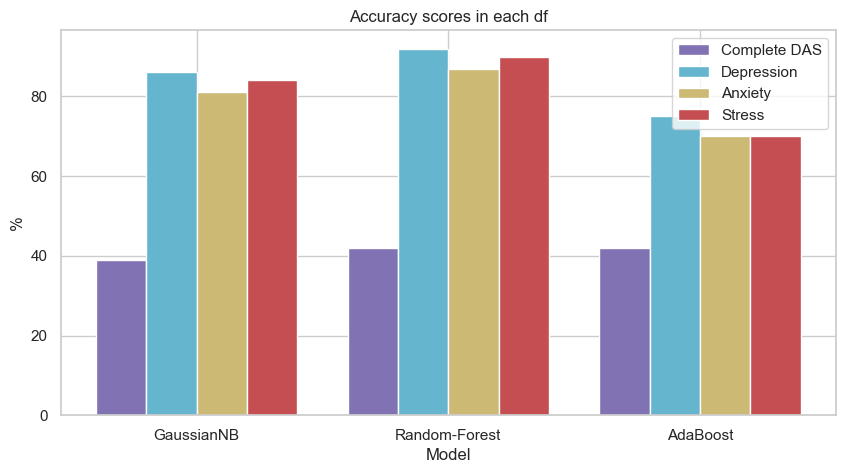

In [89]:
x=['GaussianNB','Random-Forest','AdaBoost']
X=np.arange(len(x))
plt.figure(figsize=(10,5))
bar0=plt.bar(X,summaryDass['Accuracy(%)'],color='m', width = 0.2)
bar1=plt.bar(X+0.2,summaryDepression['Accuracy(%)'],color='c',width = 0.2)
bar2=plt.bar(X+0.4,summaryAnxiety['Accuracy(%)'],color='y',width = 0.2)
bar3=plt.bar(X+0.6,summaryStress['Accuracy(%)'],color='r',width = 0.2)
plt.xticks(X+0.3,x)
plt.legend((bar0, bar1, bar2, bar3),('Complete DAS', 'Depression', 'Anxiety', 'Stress'))
plt.ylabel('%')
plt.xlabel('Model')
plt.title('Accuracy scores in each df')
plt.show()

**F1 score**

In [90]:
summaryF1 = summary.drop(columns=["Acc_Das", "Acc_Depression", "Acc_Anxiety", "Acc_Stress"], axis=1, errors="ignore")
summaryF1

,Model,F1_Das,F1_Depression,F1_Anxiety,F1_Stress
0,GaussianNB,38.0,87.0,82.0,85.0
1,Random-Forest,42.0,92.0,85.0,90.0
2,AdaBoost,42.0,76.0,72.0,71.0


**F1 score results visualization**

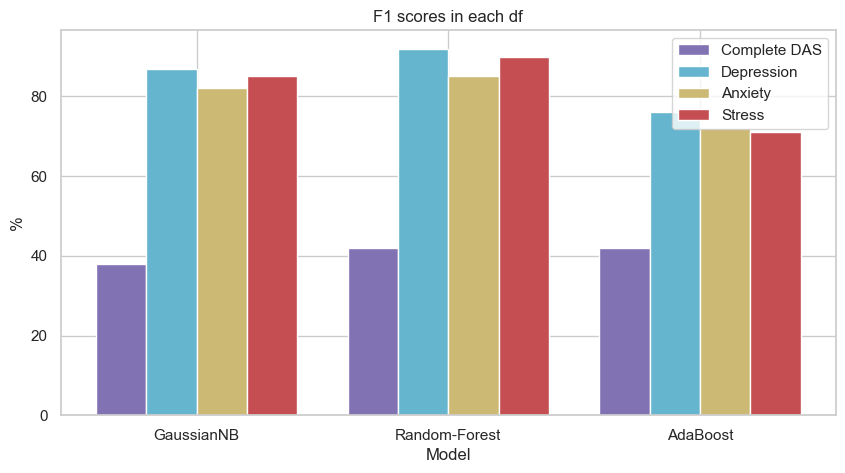

In [91]:
x=['GaussianNB','Random-Forest','AdaBoost']
X=np.arange(len(x))
plt.figure(figsize=(10,5))
bar0=plt.bar(X,summaryDass['F1_Score(%)'],color='m', width=0.2)
bar1=plt.bar(X+0.2,summaryDepression['F1_Score(%)'],color='c', width=0.2)
bar2=plt.bar(X+0.4,summaryAnxiety['F1_Score(%)'],color='y', width=0.2)
bar3=plt.bar(X+0.6,summaryStress['F1_Score(%)'],color='r', width=0.2)
plt.xticks(X+0.3,x)
plt.legend((bar0, bar1, bar2, bar3),('Complete DAS', 'Depression', 'Anxiety', 'Stress'))
plt.ylabel('%')
plt.xlabel('Model')
plt.title('F1 scores in each df')
plt.show()

### References


- O. Aran and E. Kapusuz. "Predicting Depression, Anxiety and Stress- EDA". https://www.kaggle.com/code/orkunaran/predicting-depression-anxiety-andstress-eda/notebook (https://www.kaggle.com/code/orkunaran/predicting-depression-anxiety-and-stress-eda/notebook), 2021, (accessed Nov. 10, 2022).
- S.H. Lovibond and P.F. Lovibond, "Manual for the Depression Anxiety Stress Scales" Psychology Foundation, (2nd ed.), 1995.
- Teju, "DAS PREDICTION". https://www.kaggle.com/code/teju4405/das-prediction#Races (https://www.kaggle.com/code/teju4405/das-prediction#Races),
2022, (accessed Nov. 10, 2022).
